DATOS ORIGINALES:
             Area  Income
0       Southwyck      64
1       Southwyck      68
2       Southwyck      70
3       Southwyck      60
4   Franklin Park      74
5   Franklin Park      71
6   Franklin Park      69
7   Franklin Park      70
8     Old Orchard      75
9     Old Orchard      80
10    Old Orchard      76
11    Old Orchard      78

Medias por Área:
  Southwyck: 71.0000
  Franklin Park: 77.2500
  Old Orchard: 65.5000
Media Global: 71.2500

TABLA ANOVA DE UNA VÍA
Fuente de Variación            SC     gl           CM            F      Valor-p
--------------------------------------------------------------------------------
Entre Áreas              276.5000      2     138.2500      14.1795     0.001653
Error                     87.7500      9       9.7500
Total                    364.2500     11

INTERPRETACIÓN (α = 0.05):
  F calculado = 14.1795
  F crítico = 4.2565
  Valor-p = 0.001653
  ✓ Hay diferencias significativas entre las medias de las áreas.



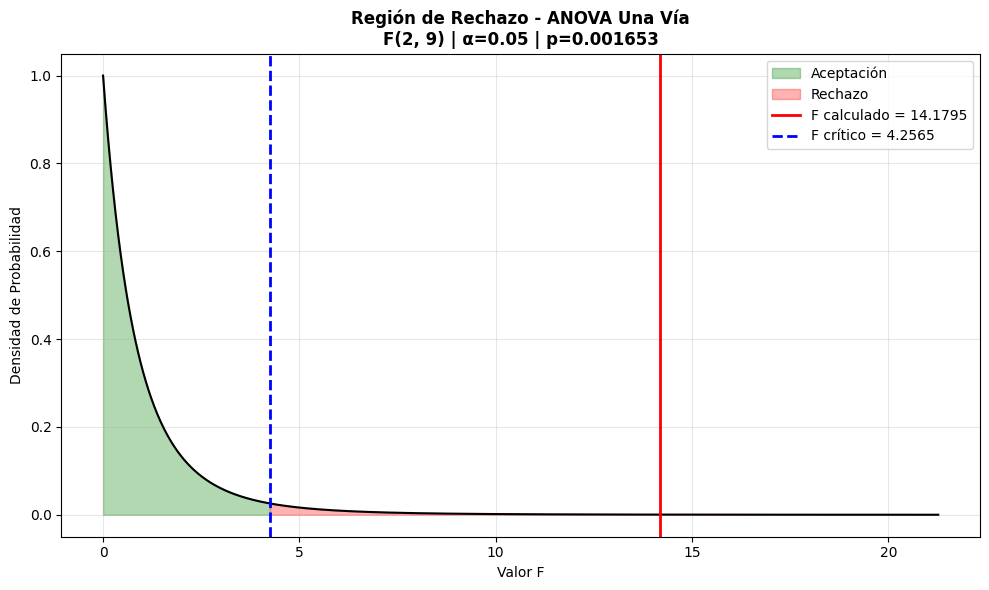

ANÁLISIS COMPLETO FINALIZADO


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL PROBLEMA
# ============================================================================

data = {
    'Area': ['Southwyck'] * 4 + ['Franklin Park'] * 4 + ['Old Orchard'] * 4,
    'Income': [64, 68, 70, 60, 74, 71, 69, 70, 75, 80, 76, 78]
}

df = pd.DataFrame(data)
areas = df['Area'].unique()

# ============================================================================
# CÁLCULOS PRELIMINARES
# ============================================================================

datos = [df[df['Area'] == a]['Income'].values for a in areas]
n_grupos = len(areas)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Income'].mean()
medias_area = df.groupby('Area')['Income'].mean().values

print("DATOS ORIGINALES:")
print(df)
print("\nMedias por Área:")
for i, area in enumerate(areas):
    print(f"  {area}: {medias_area[i]:.4f}")
print(f"Media Global: {media_global:.4f}\n")

# ============================================================================
# ANOVA DE UNA VÍA MANUAL
# ============================================================================

SCT = np.sum((df['Income'] - media_global)**2)
SCB = sum([n_obs[i]*(medias_area[i] - media_global)**2 for i in range(n_grupos)])
SCE = SCT - SCB

gl_b = n_grupos - 1
gl_e = n_total - n_grupos
gl_t = n_total - 1

CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(0.95, gl_b, gl_e)

# ============================================================================
# TABLA ANOVA
# ============================================================================

print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Áreas':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<20} {SCT:>12.4f} {gl_t:>6}")
print("="*80)

# ============================================================================
# INTERPRETACIÓN
# ============================================================================

alpha = 0.05
print(f"\nINTERPRETACIÓN (α = {alpha}):")
print(f"  F calculado = {F:.4f}")
print(f"  F crítico = {F_crit:.4f}")
print(f"  Valor-p = {p_value:.6f}")

if p_value < alpha:
    print("  ✓ Hay diferencias significativas entre las medias de las áreas.\n")
else:
    print("  ✗ No hay diferencias significativas entre las medias de las áreas.\n")

# ============================================================================
# GRÁFICO DE REGIÓN DE RECHAZO
# ============================================================================

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', linewidth=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', linewidth=2, label=f'F calculado = {F:.4f}')
plt.axvline(F_crit, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.4f}')
plt.title(f'Región de Rechazo - ANOVA Una Vía\nF({gl_b}, {gl_e}) | α=0.05 | p={p_value:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)


DATOS ORIGINALES:
          Carretera 6  West End  Hickory St.  Ruta 59
Deans              18        17           21       22
Snaverly           16        23           23       22
Ormson             21        21           26       22
Zollaco            23        22           29       25
Filbeck            25        24           28       28


Media Global: 22.8000

Medias por Conductor:
  Deans: 19.5000
  Snaverly: 21.0000
  Ormson: 22.5000
  Zollaco: 24.7500
  Filbeck: 26.2500

Medias por Ruta:
  Carretera 6: 20.6000
  West End: 21.4000
  Hickory St.: 25.4000
  Ruta 59: 23.8000


TABLA ANOVA DE DOS VÍAS
Fuente de Variación            SC     gl           CM            F      Valor-p    F crítico
----------------------------------------------------------------------------------------------------
Conductores              119.7000      4      29.9250       9.7847     0.000934       3.2592
Rutas                     72.8000      3      24.2667       7.9346     0.003508       3.4903
Error    

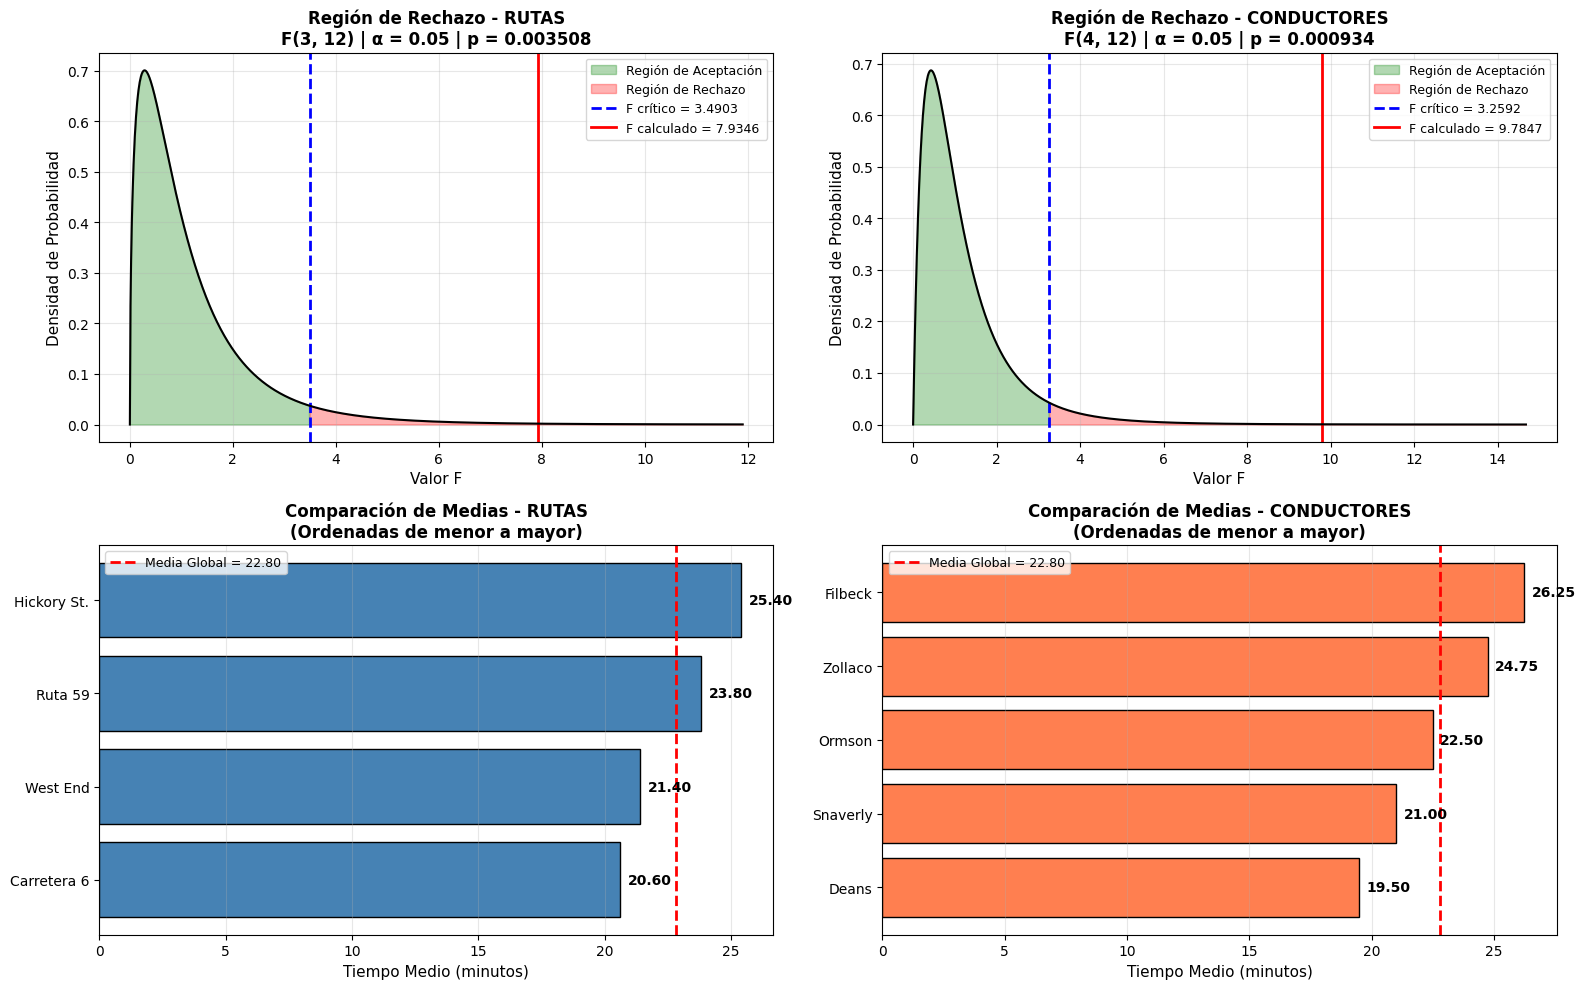

✓ Gráfico guardado como 'tukey_matrices_diferencias.png'


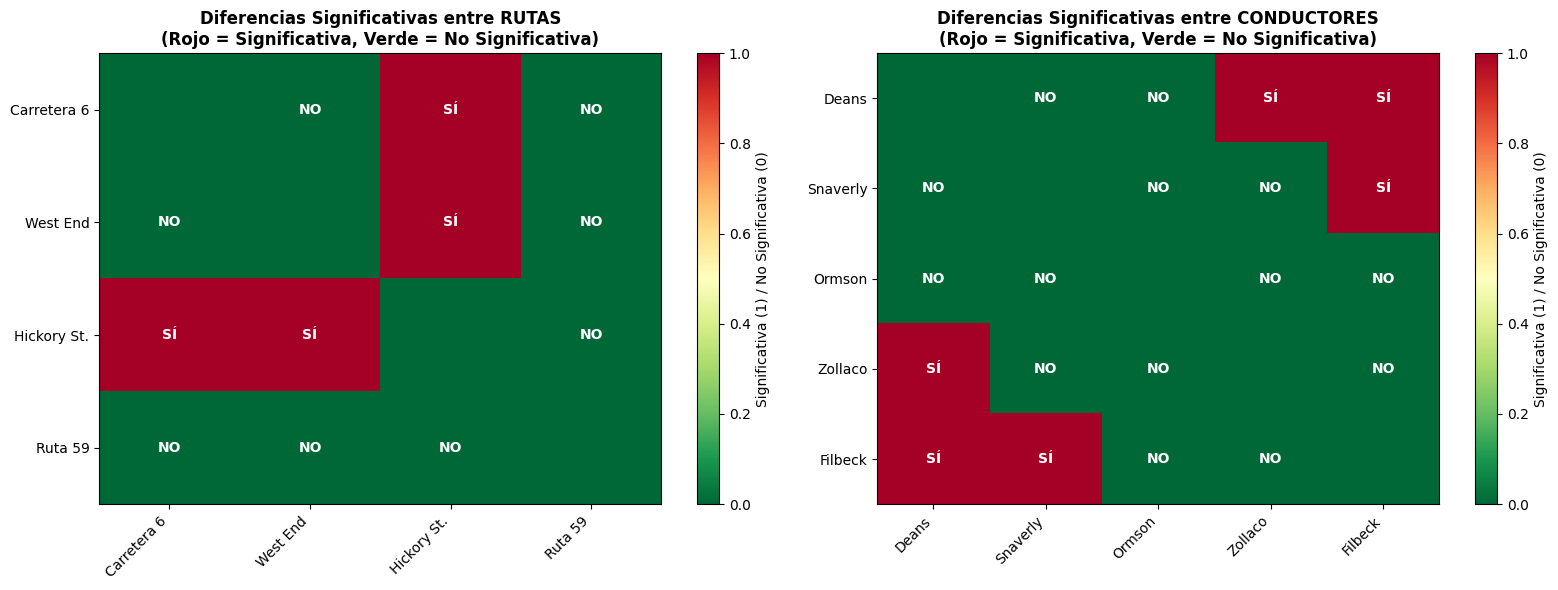


ANÁLISIS COMPLETO FINALIZADO


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from itertools import combinations

# Datos del problema
conductores = ['Deans', 'Snaverly', 'Ormson', 'Zollaco', 'Filbeck']
rutas = ['Carretera 6', 'West End', 'Hickory St.', 'Ruta 59']

# Matriz de tiempos de recorrido
datos = np.array([
    [18, 17, 21, 22],  # Deans
    [16, 23, 23, 22],  # Snaverly
    [21, 21, 26, 22],  # Ormson
    [23, 22, 29, 25],  # Zollaco
    [25, 24, 28, 28]   # Filbeck
])

# Crear DataFrame para mejor visualización
df = pd.DataFrame(datos, index=conductores, columns=rutas)
print("DATOS ORIGINALES:")
print(df)
print("\n" + "="*80 + "\n")

# Preparar datos para ANOVA
n_conductores = len(conductores)
n_rutas = len(rutas)
n_total = n_conductores * n_rutas

# Calcular medias
media_global = np.mean(datos)
medias_conductores = np.mean(datos, axis=1)
medias_rutas = np.mean(datos, axis=0)

print(f"Media Global: {media_global:.4f}")
print(f"\nMedias por Conductor:")
for i, cond in enumerate(conductores):
    print(f"  {cond}: {medias_conductores[i]:.4f}")
print(f"\nMedias por Ruta:")
for i, ruta in enumerate(rutas):
    print(f"  {ruta}: {medias_rutas[i]:.4f}")
print("\n" + "="*80 + "\n")

# ANOVA de dos vías sin interacción

# Suma de cuadrados total (SCT)
SCT = np.sum((datos - media_global)**2)

# Suma de cuadrados de conductores (SCC)
SCC = n_rutas * np.sum((medias_conductores - media_global)**2)

# Suma de cuadrados de rutas (SCR)
SCR = n_conductores * np.sum((medias_rutas - media_global)**2)

# Suma de cuadrados del error (SCE)
SCE = SCT - SCC - SCR

# Grados de libertad
gl_conductores = n_conductores - 1
gl_rutas = n_rutas - 1
gl_error = (n_conductores - 1) * (n_rutas - 1)
gl_total = n_total - 1

# Cuadrados medios
CMC = SCC / gl_conductores
CMR = SCR / gl_rutas
CME = SCE / gl_error

# Estadísticos F
F_conductores = CMC / CME
F_rutas = CMR / CME

# Valores p
p_conductores = 1 - stats.f.cdf(F_conductores, gl_conductores, gl_error)
p_rutas = 1 - stats.f.cdf(F_rutas, gl_rutas, gl_error)

# Valores críticos F para α = 0.05
F_crit_conductores = stats.f.ppf(0.95, gl_conductores, gl_error)
F_crit_rutas = stats.f.ppf(0.95, gl_rutas, gl_error)

# Crear tabla ANOVA
print("TABLA ANOVA DE DOS VÍAS")
print("="*100)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12} {'F crítico':>12}")
print("-"*100)
print(f"{'Conductores':<20} {SCC:>12.4f} {gl_conductores:>6} {CMC:>12.4f} {F_conductores:>12.4f} {p_conductores:>12.6f} {F_crit_conductores:>12.4f}")
print(f"{'Rutas':<20} {SCR:>12.4f} {gl_rutas:>6} {CMR:>12.4f} {F_rutas:>12.4f} {p_rutas:>12.6f} {F_crit_rutas:>12.4f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_error:>6} {CME:>12.4f}")
print(f"{'Total':<20} {SCT:>12.4f} {gl_total:>6}")
print("="*100)

# Interpretación de resultados
alpha = 0.05
print(f"\nINTERPRETACIÓN (α = {alpha}):")
print("-" * 80)

print(f"\n1. EFECTO DE CONDUCTORES:")
print(f"   F calculado = {F_conductores:.4f}")
print(f"   F crítico = {F_crit_conductores:.4f}")
print(f"   Valor-p = {p_conductores:.6f}")
if p_conductores < alpha:
    print(f"   ✓ Hay diferencia significativa entre conductores (p < {alpha})")
else:
    print(f"   ✗ No hay diferencia significativa entre conductores (p ≥ {alpha})")

print(f"\n2. EFECTO DE RUTAS:")
print(f"   F calculado = {F_rutas:.4f}")
print(f"   F crítico = {F_crit_rutas:.4f}")
print(f"   Valor-p = {p_rutas:.6f}")
if p_rutas < alpha:
    print(f"   ✓ Hay diferencia significativa entre rutas (p < {alpha})")
else:
    print(f"   ✗ No hay diferencia significativa entre rutas (p ≥ {alpha})")

print("\n" + "="*80)
print("\nRESPUESTA A LAS PREGUNTAS:")
print("-" * 80)
print("\n¿Hay diferencia entre los tiempos medios de las cuatro rutas?")
if p_rutas < alpha:
    print(f"SÍ, hay evidencia estadística significativa (p = {p_rutas:.6f} < 0.05)")
else:
    print(f"NO, no hay evidencia estadística significativa (p = {p_rutas:.6f} ≥ 0.05)")

print("\n¿Hay diferencia entre los tiempos medios de los conductores?")
print("(eliminando el efecto de las rutas)")
if p_conductores < alpha:
    print(f"SÍ, hay evidencia estadística significativa (p = {p_conductores:.6f} < 0.05)")
else:
    print(f"NO, no hay evidencia estadística significativa (p = {p_conductores:.6f} ≥ 0.05)")

# ============================================================================
# PRUEBA DE TUKEY (HSD - Honestly Significant Difference)
# ============================================================================

print("\n" + "="*80)
print("PRUEBA DE TUKEY (HSD)")
print("="*80)

# Para RUTAS
print("\n" + "-"*80)
print("COMPARACIONES MÚLTIPLES PARA RUTAS:")
print("-"*80)

# Cálculo del valor crítico de Tukey para rutas
q_rutas = stats.studentized_range.ppf(0.95, n_rutas, gl_error)
HSD_rutas = q_rutas * np.sqrt(CME / n_conductores)

print(f"\nValor crítico q (α=0.05, k={n_rutas}, gl_error={gl_error}): {q_rutas:.4f}")
print(f"HSD (Diferencia Honestamente Significativa): {HSD_rutas:.4f}")
print("\nComparaciones entre pares de rutas:")
print(f"{'Ruta i':<15} {'Ruta j':<15} {'Media i':>10} {'Media j':>10} {'Diferencia':>12} {'|Dif|':>10} {'Significativa':>15}")
print("-"*95)

comparaciones_rutas = []
for i, j in combinations(range(n_rutas), 2):
    diff = medias_rutas[i] - medias_rutas[j]
    abs_diff = abs(diff)
    es_sig = "SÍ" if abs_diff > HSD_rutas else "NO"
    comparaciones_rutas.append({
        'Ruta_i': rutas[i],
        'Ruta_j': rutas[j],
        'Media_i': medias_rutas[i],
        'Media_j': medias_rutas[j],
        'Diferencia': diff,
        'Abs_Diferencia': abs_diff,
        'Significativa': es_sig
    })
    print(f"{rutas[i]:<15} {rutas[j]:<15} {medias_rutas[i]:>10.4f} {medias_rutas[j]:>10.4f} {diff:>12.4f} {abs_diff:>10.4f} {es_sig:>15}")

# Para CONDUCTORES
print("\n" + "-"*80)
print("COMPARACIONES MÚLTIPLES PARA CONDUCTORES:")
print("-"*80)

# Cálculo del valor crítico de Tukey para conductores
q_conductores = stats.studentized_range.ppf(0.95, n_conductores, gl_error)
HSD_conductores = q_conductores * np.sqrt(CME / n_rutas)

print(f"\nValor crítico q (α=0.05, k={n_conductores}, gl_error={gl_error}): {q_conductores:.4f}")
print(f"HSD (Diferencia Honestamente Significativa): {HSD_conductores:.4f}")
print("\nComparaciones entre pares de conductores:")
print(f"{'Conductor i':<15} {'Conductor j':<15} {'Media i':>10} {'Media j':>10} {'Diferencia':>12} {'|Dif|':>10} {'Significativa':>15}")
print("-"*95)

comparaciones_conductores = []
for i, j in combinations(range(n_conductores), 2):
    diff = medias_conductores[i] - medias_conductores[j]
    abs_diff = abs(diff)
    es_sig = "SÍ" if abs_diff > HSD_conductores else "NO"
    comparaciones_conductores.append({
        'Conductor_i': conductores[i],
        'Conductor_j': conductores[j],
        'Media_i': medias_conductores[i],
        'Media_j': medias_conductores[j],
        'Diferencia': diff,
        'Abs_Diferencia': abs_diff,
        'Significativa': es_sig
    })
    print(f"{conductores[i]:<15} {conductores[j]:<15} {medias_conductores[i]:>10.4f} {medias_conductores[j]:>10.4f} {diff:>12.4f} {abs_diff:>10.4f} {es_sig:>15}")

# ============================================================================
# GRÁFICOS DE REGIÓN DE RECHAZO
# ============================================================================

print("\n" + "="*80)
print("GENERANDO GRÁFICOS...")
print("="*80)

fig = plt.figure(figsize=(16, 10))

# Gráfico 1: Región de rechazo para RUTAS
ax1 = plt.subplot(2, 2, 1)
x = np.linspace(0, max(F_rutas, F_crit_rutas) * 1.5, 1000)
y = stats.f.pdf(x, gl_rutas, gl_error)

# Área de aceptación
x_accept = x[x <= F_crit_rutas]
ax1.fill_between(x_accept, 0, stats.f.pdf(x_accept, gl_rutas, gl_error),
                  alpha=0.3, color='green', label='Región de Aceptación')

# Área de rechazo
x_reject = x[x >= F_crit_rutas]
ax1.fill_between(x_reject, 0, stats.f.pdf(x_reject, gl_rutas, gl_error),
                  alpha=0.3, color='red', label='Región de Rechazo')

# Líneas verticales
ax1.axvline(F_crit_rutas, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_rutas:.4f}')
ax1.axvline(F_rutas, color='red', linestyle='-', linewidth=2, label=f'F calculado = {F_rutas:.4f}')

ax1.plot(x, y, 'k-', linewidth=1.5)
ax1.set_xlabel('Valor F', fontsize=11)
ax1.set_ylabel('Densidad de Probabilidad', fontsize=11)
ax1.set_title(f'Región de Rechazo - RUTAS\nF({gl_rutas}, {gl_error}) | α = 0.05 | p = {p_rutas:.6f}', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Región de rechazo para CONDUCTORES
ax2 = plt.subplot(2, 2, 2)
x2 = np.linspace(0, max(F_conductores, F_crit_conductores) * 1.5, 1000)
y2 = stats.f.pdf(x2, gl_conductores, gl_error)

# Área de aceptación
x_accept2 = x2[x2 <= F_crit_conductores]
ax2.fill_between(x_accept2, 0, stats.f.pdf(x_accept2, gl_conductores, gl_error),
                  alpha=0.3, color='green', label='Región de Aceptación')

# Área de rechazo
x_reject2 = x2[x2 >= F_crit_conductores]
ax2.fill_between(x_reject2, 0, stats.f.pdf(x_reject2, gl_conductores, gl_error),
                  alpha=0.3, color='red', label='Región de Rechazo')

# Líneas verticales
ax2.axvline(F_crit_conductores, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_conductores:.4f}')
ax2.axvline(F_conductores, color='red', linestyle='-', linewidth=2, label=f'F calculado = {F_conductores:.4f}')

ax2.plot(x2, y2, 'k-', linewidth=1.5)
ax2.set_xlabel('Valor F', fontsize=11)
ax2.set_ylabel('Densidad de Probabilidad', fontsize=11)
ax2.set_title(f'Región de Rechazo - CONDUCTORES\nF({gl_conductores}, {gl_error}) | α = 0.05 | p = {p_conductores:.6f}', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Gráfico 3: Comparaciones de Tukey para RUTAS
ax3 = plt.subplot(2, 2, 3)
rutas_ordenadas = sorted(range(n_rutas), key=lambda i: medias_rutas[i])
medias_ord_rutas = [medias_rutas[i] for i in rutas_ordenadas]
nombres_ord_rutas = [rutas[i] for i in rutas_ordenadas]

bars3 = ax3.barh(nombres_ord_rutas, medias_ord_rutas, color='steelblue', edgecolor='black')
ax3.axvline(media_global, color='red', linestyle='--', linewidth=2, label=f'Media Global = {media_global:.2f}')
ax3.set_xlabel('Tiempo Medio (minutos)', fontsize=11)
ax3.set_title('Comparación de Medias - RUTAS\n(Ordenadas de menor a mayor)', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for bar, val in zip(bars3, medias_ord_rutas):
    ax3.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.2f}',
             va='center', fontsize=10, fontweight='bold')

# Gráfico 4: Comparaciones de Tukey para CONDUCTORES
ax4 = plt.subplot(2, 2, 4)
cond_ordenados = sorted(range(n_conductores), key=lambda i: medias_conductores[i])
medias_ord_cond = [medias_conductores[i] for i in cond_ordenados]
nombres_ord_cond = [conductores[i] for i in cond_ordenados]

bars4 = ax4.barh(nombres_ord_cond, medias_ord_cond, color='coral', edgecolor='black')
ax4.axvline(media_global, color='red', linestyle='--', linewidth=2, label=f'Media Global = {media_global:.2f}')
ax4.set_xlabel('Tiempo Medio (minutos)', fontsize=11)
ax4.set_title('Comparación de Medias - CONDUCTORES\n(Ordenadas de menor a mayor)', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for bar, val in zip(bars4, medias_ord_cond):
    ax4.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.2f}',
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('anova_dos_vias_analisis.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado como 'anova_dos_vias_analisis.png'")
plt.show()

# Gráfico adicional: Matriz de diferencias significativas
fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de diferencias para RUTAS
diff_matrix_rutas = np.zeros((n_rutas, n_rutas))
for i in range(n_rutas):
    for j in range(n_rutas):
        if i != j:
            diff = abs(medias_rutas[i] - medias_rutas[j])
            diff_matrix_rutas[i, j] = 1 if diff > HSD_rutas else 0

im1 = ax5.imshow(diff_matrix_rutas, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=1)
ax5.set_xticks(range(n_rutas))
ax5.set_yticks(range(n_rutas))
ax5.set_xticklabels(rutas, rotation=45, ha='right')
ax5.set_yticklabels(rutas)
ax5.set_title('Diferencias Significativas entre RUTAS\n(Rojo = Significativa, Verde = No Significativa)',
              fontsize=12, fontweight='bold')

for i in range(n_rutas):
    for j in range(n_rutas):
        if i != j:
            text = ax5.text(j, i, 'SÍ' if diff_matrix_rutas[i, j] == 1 else 'NO',
                          ha='center', va='center', color='white', fontweight='bold', fontsize=10)

plt.colorbar(im1, ax=ax5, label='Significativa (1) / No Significativa (0)')

# Matriz de diferencias para CONDUCTORES
diff_matrix_cond = np.zeros((n_conductores, n_conductores))
for i in range(n_conductores):
    for j in range(n_conductores):
        if i != j:
            diff = abs(medias_conductores[i] - medias_conductores[j])
            diff_matrix_cond[i, j] = 1 if diff > HSD_conductores else 0

im2 = ax6.imshow(diff_matrix_cond, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=1)
ax6.set_xticks(range(n_conductores))
ax6.set_yticks(range(n_conductores))
ax6.set_xticklabels(conductores, rotation=45, ha='right')
ax6.set_yticklabels(conductores)
ax6.set_title('Diferencias Significativas entre CONDUCTORES\n(Rojo = Significativa, Verde = No Significativa)',
              fontsize=12, fontweight='bold')

for i in range(n_conductores):
    for j in range(n_conductores):
        if i != j:
            text = ax6.text(j, i, 'SÍ' if diff_matrix_cond[i, j] == 1 else 'NO',
                          ha='center', va='center', color='white', fontweight='bold', fontsize=10)

plt.colorbar(im2, ax=ax6, label='Significativa (1) / No Significativa (0)')

plt.tight_layout()
plt.savefig('tukey_matrices_diferencias.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico guardado como 'tukey_matrices_diferencias.png'")
plt.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)

PROBLEMA: CIRUGÍAS EN HOSPITALES DE TULSA, OKLAHOMA

DATOS ORIGINALES:
           St. Luke's  St. Vincent  Mercy
Lunes              14           18     24
Martes             20           24     14
Miércoles          16           22     14
Jueves             18           20     22
Viernes            20           28     24


Media Global: 19.8667 cirugías

Medias por Día de la Semana:
  Lunes.......  18.6667 cirugías
  Martes......  19.3333 cirugías
  Miércoles...  17.3333 cirugías
  Jueves......  20.0000 cirugías
  Viernes.....  24.0000 cirugías

Medias por Hospital:
  St. Luke's.....  17.6000 cirugías
  St. Vincent....  22.4000 cirugías
  Mercy..........  19.6000 cirugías


TABLA ANOVA DE DOS VÍAS
Fuente de Variación            SC     gl           CM            F      Valor-p    F crítico
----------------------------------------------------------------------------------------------------
Días de la Semana         75.7333      4      18.9333       1.2851     0.352359       3.8379
Hospit

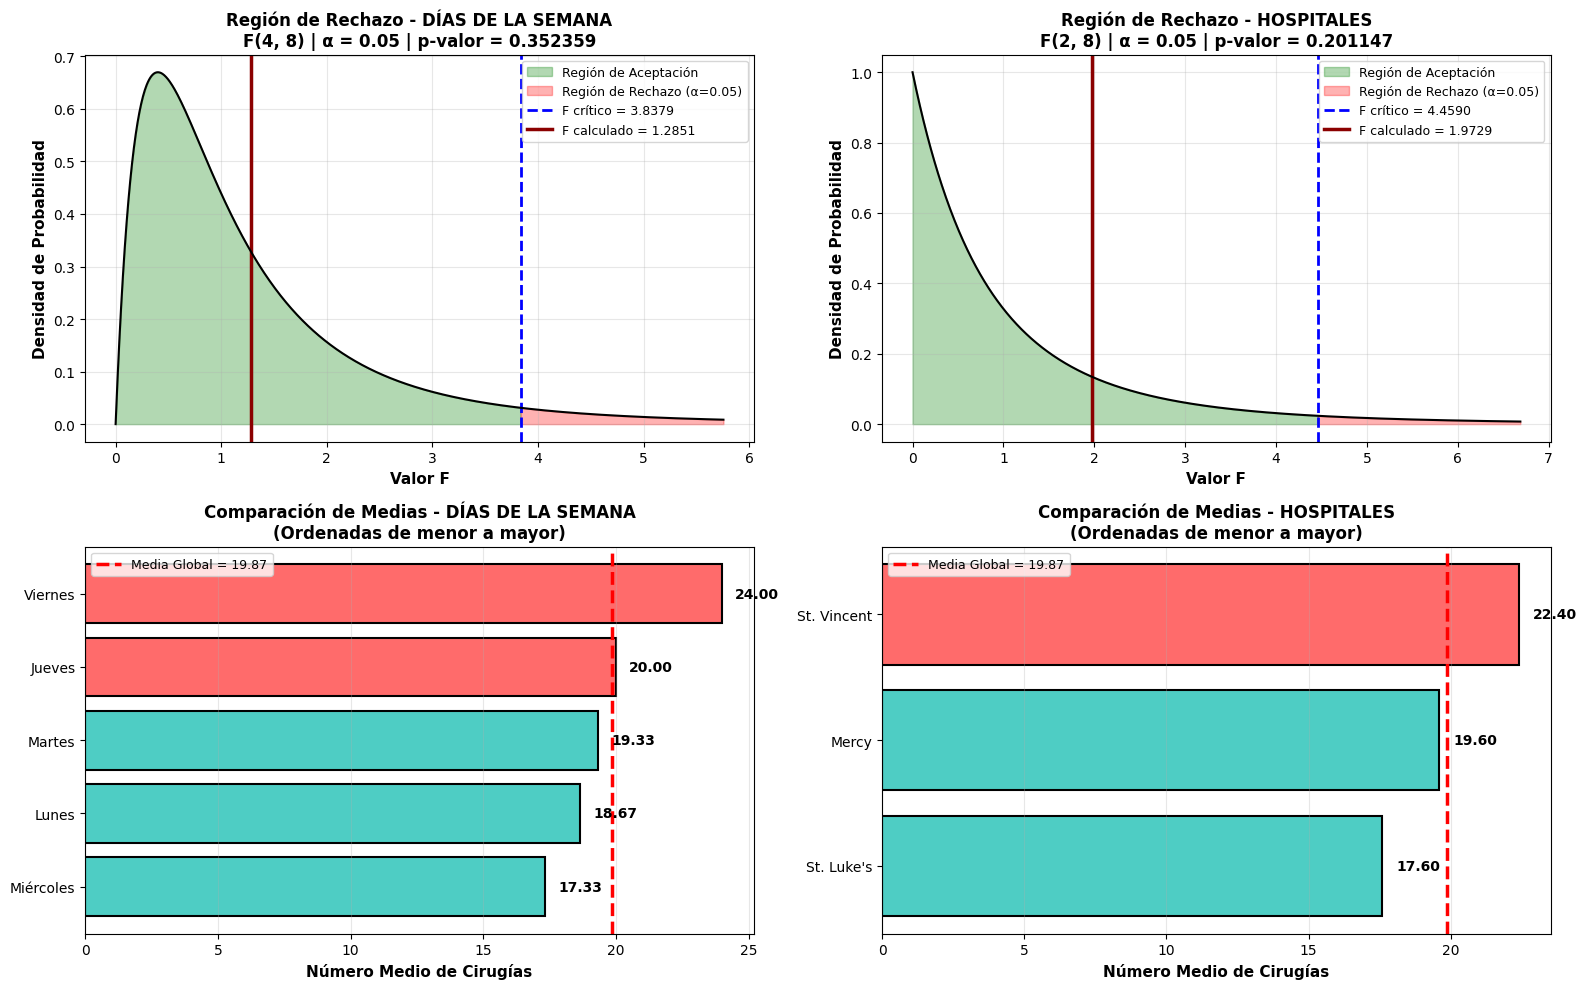

✓ Gráfico guardado como 'cirugias_tukey_matrices.png'


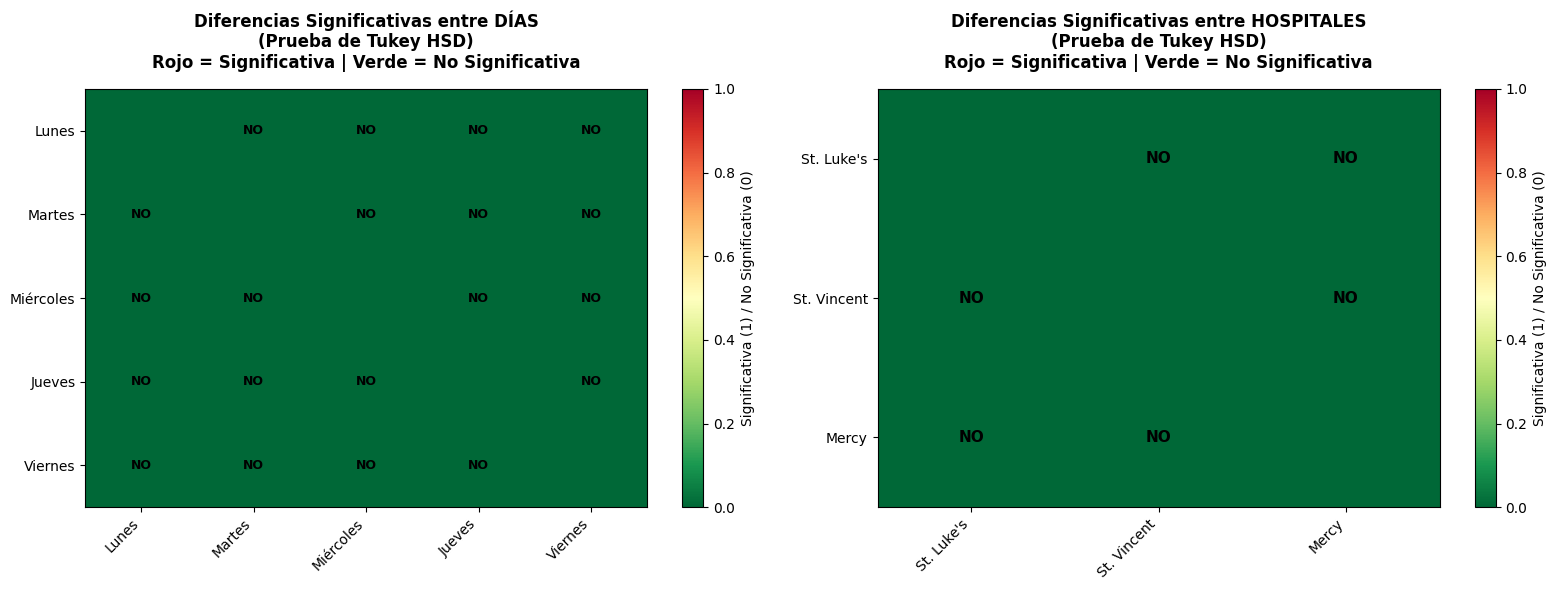


ANÁLISIS COMPLETO FINALIZADO

CONCLUSIÓN FINAL:
--------------------------------------------------------------------------------
✗ No se encontraron diferencias significativas ni por hospital ni por día.


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from itertools import combinations

# Configuración para mejor visualización
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

# Datos del problema - Hospitales de Tulsa, Oklahoma
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']
hospitales = ["St. Luke's", "St. Vincent", "Mercy"]

# Matriz de número de cirugías realizadas
datos = np.array([
    [14, 18, 24],  # Lunes
    [20, 24, 14],  # Martes
    [16, 22, 14],  # Miércoles
    [18, 20, 22],  # Jueves
    [20, 28, 24]   # Viernes
])

# Crear DataFrame para mejor visualización
df = pd.DataFrame(datos, index=dias, columns=hospitales)
print("="*80)
print("PROBLEMA: CIRUGÍAS EN HOSPITALES DE TULSA, OKLAHOMA")
print("="*80)
print("\nDATOS ORIGINALES:")
print(df)
print("\n" + "="*80 + "\n")

# Preparar datos para ANOVA
n_dias = len(dias)
n_hospitales = len(hospitales)
n_total = n_dias * n_hospitales

# Calcular medias
media_global = np.mean(datos)
medias_dias = np.mean(datos, axis=1)
medias_hospitales = np.mean(datos, axis=0)

print(f"Media Global: {media_global:.4f} cirugías")
print(f"\nMedias por Día de la Semana:")
for i, dia in enumerate(dias):
    print(f"  {dia:.<12} {medias_dias[i]:>8.4f} cirugías")
print(f"\nMedias por Hospital:")
for i, hosp in enumerate(hospitales):
    print(f"  {hosp:.<15} {medias_hospitales[i]:>8.4f} cirugías")
print("\n" + "="*80 + "\n")

# ANOVA de dos vías sin interacción

# Suma de cuadrados total (SCT)
SCT = np.sum((datos - media_global)**2)

# Suma de cuadrados de días (SCD)
SCD = n_hospitales * np.sum((medias_dias - media_global)**2)

# Suma de cuadrados de hospitales (SCH)
SCH = n_dias * np.sum((medias_hospitales - media_global)**2)

# Suma de cuadrados del error (SCE)
SCE = SCT - SCD - SCH

# Grados de libertad
gl_dias = n_dias - 1
gl_hospitales = n_hospitales - 1
gl_error = (n_dias - 1) * (n_hospitales - 1)
gl_total = n_total - 1

# Cuadrados medios
CMD = SCD / gl_dias
CMH = SCH / gl_hospitales
CME = SCE / gl_error

# Estadísticos F
F_dias = CMD / CME
F_hospitales = CMH / CME

# Valores p
p_dias = 1 - stats.f.cdf(F_dias, gl_dias, gl_error)
p_hospitales = 1 - stats.f.cdf(F_hospitales, gl_hospitales, gl_error)

# Valores críticos F para α = 0.05
F_crit_dias = stats.f.ppf(0.95, gl_dias, gl_error)
F_crit_hospitales = stats.f.ppf(0.95, gl_hospitales, gl_error)

# Crear tabla ANOVA
print("TABLA ANOVA DE DOS VÍAS")
print("="*100)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12} {'F crítico':>12}")
print("-"*100)
print(f"{'Días de la Semana':<20} {SCD:>12.4f} {gl_dias:>6} {CMD:>12.4f} {F_dias:>12.4f} {p_dias:>12.6f} {F_crit_dias:>12.4f}")
print(f"{'Hospitales':<20} {SCH:>12.4f} {gl_hospitales:>6} {CMH:>12.4f} {F_hospitales:>12.4f} {p_hospitales:>12.6f} {F_crit_hospitales:>12.4f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_error:>6} {CME:>12.4f}")
print(f"{'Total':<20} {SCT:>12.4f} {gl_total:>6}")
print("="*100)

# Interpretación de resultados
alpha = 0.05
print(f"\nINTERPRETACIÓN (α = {alpha}):")
print("-" * 80)

print(f"\n1. EFECTO DE LOS DÍAS DE LA SEMANA:")
print(f"   F calculado = {F_dias:.4f}")
print(f"   F crítico = {F_crit_dias:.4f}")
print(f"   Valor-p = {p_dias:.6f}")
if p_dias < alpha:
    print(f"   ✓ Hay diferencia significativa entre días (p < {alpha})")
    print(f"   → El número de cirugías varía significativamente según el día")
else:
    print(f"   ✗ No hay diferencia significativa entre días (p ≥ {alpha})")
    print(f"   → El número de cirugías es similar en todos los días")

print(f"\n2. EFECTO DE LOS HOSPITALES:")
print(f"   F calculado = {F_hospitales:.4f}")
print(f"   F crítico = {F_crit_hospitales:.4f}")
print(f"   Valor-p = {p_hospitales:.6f}")
if p_hospitales < alpha:
    print(f"   ✓ Hay diferencia significativa entre hospitales (p < {alpha})")
    print(f"   → Los hospitales realizan diferentes números de cirugías")
else:
    print(f"   ✗ No hay diferencia significativa entre hospitales (p ≥ {alpha})")
    print(f"   → Los hospitales realizan números similares de cirugías")

# ============================================================================
# PRUEBA DE TUKEY (HSD - Honestly Significant Difference)
# ============================================================================

print("\n" + "="*80)
print("PRUEBA DE TUKEY (HSD) - COMPARACIONES MÚLTIPLES")
print("="*80)

# Para DÍAS DE LA SEMANA
print("\n" + "-"*80)
print("COMPARACIONES ENTRE DÍAS DE LA SEMANA:")
print("-"*80)

# Cálculo del valor crítico de Tukey para días
q_dias = stats.studentized_range.ppf(0.95, n_dias, gl_error)
HSD_dias = q_dias * np.sqrt(CME / n_hospitales)

print(f"\nValor crítico q (α=0.05, k={n_dias}, gl_error={gl_error}): {q_dias:.4f}")
print(f"HSD (Diferencia Honestamente Significativa): {HSD_dias:.4f} cirugías")
print("\nComparaciones entre pares de días:")
print(f"{'Día i':<12} {'Día j':<12} {'Media i':>10} {'Media j':>10} {'Diferencia':>12} {'|Dif|':>10} {'Significativa':>15}")
print("-"*90)

comparaciones_dias = []
for i, j in combinations(range(n_dias), 2):
    diff = medias_dias[i] - medias_dias[j]
    abs_diff = abs(diff)
    es_sig = "SÍ" if abs_diff > HSD_dias else "NO"
    comparaciones_dias.append({
        'Dia_i': dias[i],
        'Dia_j': dias[j],
        'Media_i': medias_dias[i],
        'Media_j': medias_dias[j],
        'Diferencia': diff,
        'Abs_Diferencia': abs_diff,
        'Significativa': es_sig
    })
    print(f"{dias[i]:<12} {dias[j]:<12} {medias_dias[i]:>10.4f} {medias_dias[j]:>10.4f} {diff:>12.4f} {abs_diff:>10.4f} {es_sig:>15}")

# Para HOSPITALES
print("\n" + "-"*80)
print("COMPARACIONES ENTRE HOSPITALES:")
print("-"*80)

# Cálculo del valor crítico de Tukey para hospitales
q_hospitales = stats.studentized_range.ppf(0.95, n_hospitales, gl_error)
HSD_hospitales = q_hospitales * np.sqrt(CME / n_dias)

print(f"\nValor crítico q (α=0.05, k={n_hospitales}, gl_error={gl_error}): {q_hospitales:.4f}")
print(f"HSD (Diferencia Honestamente Significativa): {HSD_hospitales:.4f} cirugías")
print("\nComparaciones entre pares de hospitales:")
print(f"{'Hospital i':<15} {'Hospital j':<15} {'Media i':>10} {'Media j':>10} {'Diferencia':>12} {'|Dif|':>10} {'Significativa':>15}")
print("-"*95)

comparaciones_hospitales = []
for i, j in combinations(range(n_hospitales), 2):
    diff = medias_hospitales[i] - medias_hospitales[j]
    abs_diff = abs(diff)
    es_sig = "SÍ" if abs_diff > HSD_hospitales else "NO"
    comparaciones_hospitales.append({
        'Hospital_i': hospitales[i],
        'Hospital_j': hospitales[j],
        'Media_i': medias_hospitales[i],
        'Media_j': medias_hospitales[j],
        'Diferencia': diff,
        'Abs_Diferencia': abs_diff,
        'Significativa': es_sig
    })
    print(f"{hospitales[i]:<15} {hospitales[j]:<15} {medias_hospitales[i]:>10.4f} {medias_hospitales[j]:>10.4f} {diff:>12.4f} {abs_diff:>10.4f} {es_sig:>15}")

# ============================================================================
# RESPUESTA A LA PREGUNTA DEL PROBLEMA
# ============================================================================

print("\n" + "="*80)
print("RESPUESTA A LA PREGUNTA DEL PROBLEMA:")
print("="*80)
print("\n¿Puede concluir que hay una diferencia entre los números medios de cirugías")
print("realizadas por cada hospital o por día de la semana?")
print("-" * 80)

print("\n📊 RESULTADO PARA HOSPITALES:")
if p_hospitales < alpha:
    print(f"   SÍ, hay diferencia significativa (p = {p_hospitales:.6f} < 0.05)")
    print(f"   Los tres hospitales realizan cantidades diferentes de cirugías.")
    # Identificar diferencias significativas
    sig_hosp = [c for c in comparaciones_hospitales if c['Significativa'] == 'SÍ']
    if sig_hosp:
        print(f"\n   Diferencias significativas encontradas:")
        for comp in sig_hosp:
            print(f"   • {comp['Hospital_i']} vs {comp['Hospital_j']}: diferencia de {comp['Abs_Diferencia']:.2f} cirugías")
else:
    print(f"   NO, no hay diferencia significativa (p = {p_hospitales:.6f} ≥ 0.05)")
    print(f"   Los tres hospitales realizan cantidades similares de cirugías.")

print("\n📅 RESULTADO PARA DÍAS DE LA SEMANA:")
if p_dias < alpha:
    print(f"   SÍ, hay diferencia significativa (p = {p_dias:.6f} < 0.05)")
    print(f"   El número de cirugías varía según el día de la semana.")
    # Identificar diferencias significativas
    sig_dias = [c for c in comparaciones_dias if c['Significativa'] == 'SÍ']
    if sig_dias:
        print(f"\n   Diferencias significativas encontradas:")
        for comp in sig_dias:
            print(f"   • {comp['Dia_i']} vs {comp['Dia_j']}: diferencia de {comp['Abs_Diferencia']:.2f} cirugías")
else:
    print(f"   NO, no hay diferencia significativa (p = {p_dias:.6f} ≥ 0.05)")
    print(f"   El número de cirugías es similar en todos los días de la semana.")

# ============================================================================
# GRÁFICOS DE REGIÓN DE RECHAZO Y COMPARACIONES
# ============================================================================

print("\n" + "="*80)
print("GENERANDO GRÁFICOS...")
print("="*80)

fig = plt.figure(figsize=(16, 10))

# Gráfico 1: Región de rechazo para DÍAS
ax1 = plt.subplot(2, 2, 1)
x = np.linspace(0, max(F_dias, F_crit_dias) * 1.5, 1000)
y = stats.f.pdf(x, gl_dias, gl_error)

# Área de aceptación
x_accept = x[x <= F_crit_dias]
ax1.fill_between(x_accept, 0, stats.f.pdf(x_accept, gl_dias, gl_error),
                  alpha=0.3, color='green', label='Región de Aceptación')

# Área de rechazo
x_reject = x[x >= F_crit_dias]
ax1.fill_between(x_reject, 0, stats.f.pdf(x_reject, gl_dias, gl_error),
                  alpha=0.3, color='red', label='Región de Rechazo (α=0.05)')

# Líneas verticales
ax1.axvline(F_crit_dias, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_dias:.4f}')
ax1.axvline(F_dias, color='darkred', linestyle='-', linewidth=2.5, label=f'F calculado = {F_dias:.4f}')

ax1.plot(x, y, 'k-', linewidth=1.5)
ax1.set_xlabel('Valor F', fontsize=11, fontweight='bold')
ax1.set_ylabel('Densidad de Probabilidad', fontsize=11, fontweight='bold')
ax1.set_title(f'Región de Rechazo - DÍAS DE LA SEMANA\nF({gl_dias}, {gl_error}) | α = 0.05 | p-valor = {p_dias:.6f}',
              fontsize=12, fontweight='bold')
ax1.legend(fontsize=9, loc='upper right')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Región de rechazo para HOSPITALES
ax2 = plt.subplot(2, 2, 2)
x2 = np.linspace(0, max(F_hospitales, F_crit_hospitales) * 1.5, 1000)
y2 = stats.f.pdf(x2, gl_hospitales, gl_error)

# Área de aceptación
x_accept2 = x2[x2 <= F_crit_hospitales]
ax2.fill_between(x_accept2, 0, stats.f.pdf(x_accept2, gl_hospitales, gl_error),
                  alpha=0.3, color='green', label='Región de Aceptación')

# Área de rechazo
x_reject2 = x2[x2 >= F_crit_hospitales]
ax2.fill_between(x_reject2, 0, stats.f.pdf(x_reject2, gl_hospitales, gl_error),
                  alpha=0.3, color='red', label='Región de Rechazo (α=0.05)')

# Líneas verticales
ax2.axvline(F_crit_hospitales, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_hospitales:.4f}')
ax2.axvline(F_hospitales, color='darkred', linestyle='-', linewidth=2.5, label=f'F calculado = {F_hospitales:.4f}')

ax2.plot(x2, y2, 'k-', linewidth=1.5)
ax2.set_xlabel('Valor F', fontsize=11, fontweight='bold')
ax2.set_ylabel('Densidad de Probabilidad', fontsize=11, fontweight='bold')
ax2.set_title(f'Región de Rechazo - HOSPITALES\nF({gl_hospitales}, {gl_error}) | α = 0.05 | p-valor = {p_hospitales:.6f}',
              fontsize=12, fontweight='bold')
ax2.legend(fontsize=9, loc='upper right')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Comparaciones de medias para DÍAS
ax3 = plt.subplot(2, 2, 3)
dias_ordenados = sorted(range(n_dias), key=lambda i: medias_dias[i])
medias_ord_dias = [medias_dias[i] for i in dias_ordenados]
nombres_ord_dias = [dias[i] for i in dias_ordenados]

colors3 = ['#FF6B6B' if medias_ord_dias[i] > media_global else '#4ECDC4' for i in range(n_dias)]
bars3 = ax3.barh(nombres_ord_dias, medias_ord_dias, color=colors3, edgecolor='black', linewidth=1.5)
ax3.axvline(media_global, color='red', linestyle='--', linewidth=2.5, label=f'Media Global = {media_global:.2f}')
ax3.set_xlabel('Número Medio de Cirugías', fontsize=11, fontweight='bold')
ax3.set_title('Comparación de Medias - DÍAS DE LA SEMANA\n(Ordenadas de menor a mayor)',
              fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for bar, val in zip(bars3, medias_ord_dias):
    ax3.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.2f}',
             va='center', fontsize=10, fontweight='bold')

# Gráfico 4: Comparaciones de medias para HOSPITALES
ax4 = plt.subplot(2, 2, 4)
hosp_ordenados = sorted(range(n_hospitales), key=lambda i: medias_hospitales[i])
medias_ord_hosp = [medias_hospitales[i] for i in hosp_ordenados]
nombres_ord_hosp = [hospitales[i] for i in hosp_ordenados]

colors4 = ['#FF6B6B' if medias_ord_hosp[i] > media_global else '#4ECDC4' for i in range(n_hospitales)]
bars4 = ax4.barh(nombres_ord_hosp, medias_ord_hosp, color=colors4, edgecolor='black', linewidth=1.5)
ax4.axvline(media_global, color='red', linestyle='--', linewidth=2.5, label=f'Media Global = {media_global:.2f}')
ax4.set_xlabel('Número Medio de Cirugías', fontsize=11, fontweight='bold')
ax4.set_title('Comparación de Medias - HOSPITALES\n(Ordenadas de menor a mayor)',
              fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for bar, val in zip(bars4, medias_ord_hosp):
    ax4.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.2f}',
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('cirugias_hospitales_anova.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado como 'cirugias_hospitales_anova.png'")
plt.show()

# Gráfico adicional: Matrices de diferencias significativas
fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de diferencias para DÍAS
diff_matrix_dias = np.zeros((n_dias, n_dias))
for i in range(n_dias):
    for j in range(n_dias):
        if i != j:
            diff = abs(medias_dias[i] - medias_dias[j])
            diff_matrix_dias[i, j] = 1 if diff > HSD_dias else 0

im1 = ax5.imshow(diff_matrix_dias, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=1)
ax5.set_xticks(range(n_dias))
ax5.set_yticks(range(n_dias))
ax5.set_xticklabels(dias, rotation=45, ha='right', fontsize=10)
ax5.set_yticklabels(dias, fontsize=10)
ax5.set_title('Diferencias Significativas entre DÍAS\n(Prueba de Tukey HSD)\nRojo = Significativa | Verde = No Significativa',
              fontsize=12, fontweight='bold', pad=15)

for i in range(n_dias):
    for j in range(n_dias):
        if i != j:
            text_val = 'SÍ' if diff_matrix_dias[i, j] == 1 else 'NO'
            color = 'white' if diff_matrix_dias[i, j] == 1 else 'black'
            ax5.text(j, i, text_val, ha='center', va='center',
                    color=color, fontweight='bold', fontsize=9)

plt.colorbar(im1, ax=ax5, label='Significativa (1) / No Significativa (0)')

# Matriz de diferencias para HOSPITALES
diff_matrix_hosp = np.zeros((n_hospitales, n_hospitales))
for i in range(n_hospitales):
    for j in range(n_hospitales):
        if i != j:
            diff = abs(medias_hospitales[i] - medias_hospitales[j])
            diff_matrix_hosp[i, j] = 1 if diff > HSD_hospitales else 0

im2 = ax6.imshow(diff_matrix_hosp, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=1)
ax6.set_xticks(range(n_hospitales))
ax6.set_yticks(range(n_hospitales))
ax6.set_xticklabels(hospitales, rotation=45, ha='right', fontsize=10)
ax6.set_yticklabels(hospitales, fontsize=10)
ax6.set_title('Diferencias Significativas entre HOSPITALES\n(Prueba de Tukey HSD)\nRojo = Significativa | Verde = No Significativa',
              fontsize=12, fontweight='bold', pad=15)

for i in range(n_hospitales):
    for j in range(n_hospitales):
        if i != j:
            text_val = 'SÍ' if diff_matrix_hosp[i, j] == 1 else 'NO'
            color = 'white' if diff_matrix_hosp[i, j] == 1 else 'black'
            ax6.text(j, i, text_val, ha='center', va='center',
                    color=color, fontweight='bold', fontsize=11)

plt.colorbar(im2, ax=ax6, label='Significativa (1) / No Significativa (0)')

plt.tight_layout()
plt.savefig('cirugias_tukey_matrices.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico guardado como 'cirugias_tukey_matrices.png'")
plt.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)
print("\nCONCLUSIÓN FINAL:")
print("-" * 80)
if p_hospitales < alpha or p_dias < alpha:
    print("✓ Se encontraron diferencias significativas en el número de cirugías.")
    if p_hospitales < alpha and p_dias < alpha:
        print("  Tanto los hospitales como los días de la semana muestran diferencias.")
    elif p_hospitales < alpha:
        print("  Las diferencias se deben a los hospitales, no a los días.")
    else:
        print("  Las diferencias se deben a los días de la semana, no a los hospitales.")
else:
    print("✗ No se encontraron diferencias significativas ni por hospital ni por día.")
print("="*80)

ESTADÍSTICOS DESCRIPTIVOS

Medias por grupo:
Area         Genero   
I+D          Femenino      779.50
             Masculino    1033.75
Manufactura  Femenino      966.50
             Masculino     941.00
Marketing    Femenino      923.00
             Masculino     999.75
Name: Salario, dtype: float64

Media general: 940.58

TABLA ANOVA DE DOS VÍAS CON INTERACCIÓN
Fuente               SC           gl     CM           F          p-valor    F crítico 
--------------------------------------------------------------------------------
Área (A)             14070.58     2      7035.29      0.7344     0.493620   3.5546    
Género (B)           62220.17     1      62220.17     6.4952     0.020160   4.4139    
Interacción (AB)     80147.58     2      40073.79     4.1833     0.032208   3.5546    
Error                172429.50    18     9579.42     
Total                328867.83    23    

CONCLUSIONES ANOVA (α = 0.05):
------------------------------------------------------------------------------

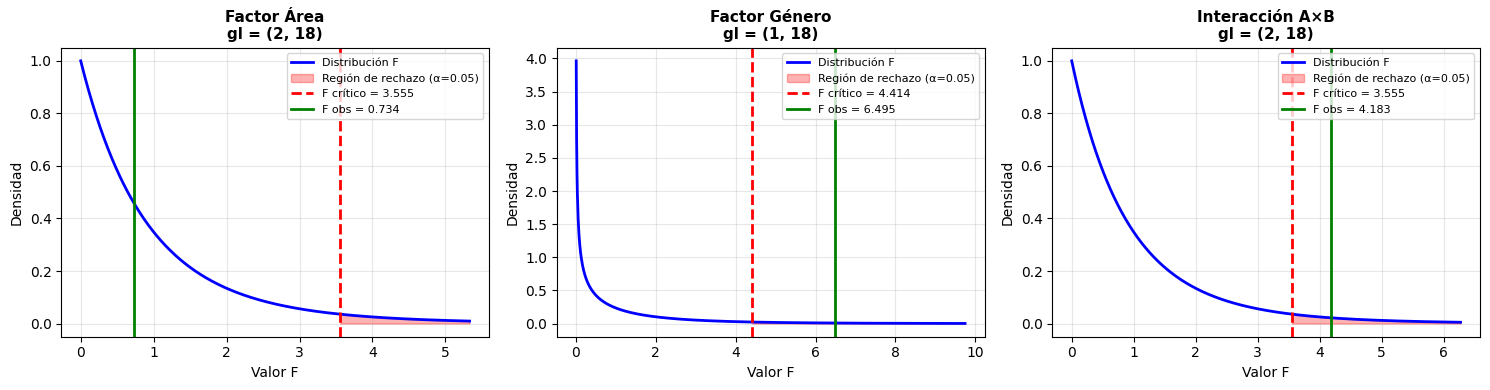


PRUEBAS POST-HOC DE TUKEY

1. COMPARACIONES MÚLTIPLES - FACTOR ÁREA:
   No se realiza la prueba de Tukey para el Factor Área porque el ANOVA no fue significativo.

2. COMPARACIONES MÚLTIPLES - FACTOR GÉNERO:
   HSD (Diferencia Honestamente Significativa) = 83.95

   Comparación                    Diferencia      Significativo  
   ------------------------------------------------------------
    Femenino  vs Masculino          101.83           Sí       

3. COMPARACIONES MÚLTIPLES - INTERACCIÓN (ÁREA × GÉNERO):
   HSD (Diferencia Honestamente Significativa) = 219.94

   Comparación                                   Diferencia      Significativo  
   ---------------------------------------------------------------------------
   ('I+D', 'Femenino')  vs ('I+D', 'Masculino')      254.25           Sí       
   ('I+D', 'Femenino')  vs ('Manufactura', 'Femenino')      187.00           No       
   ('I+D', 'Femenino')  vs ('Manufactura', 'Masculino')      161.50           No       
   ('I+D', 

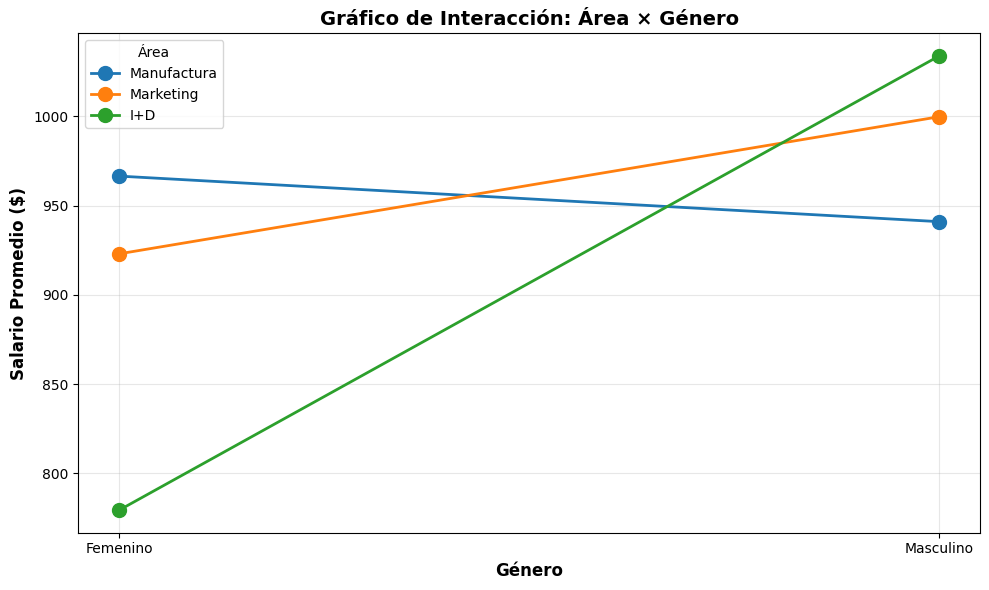

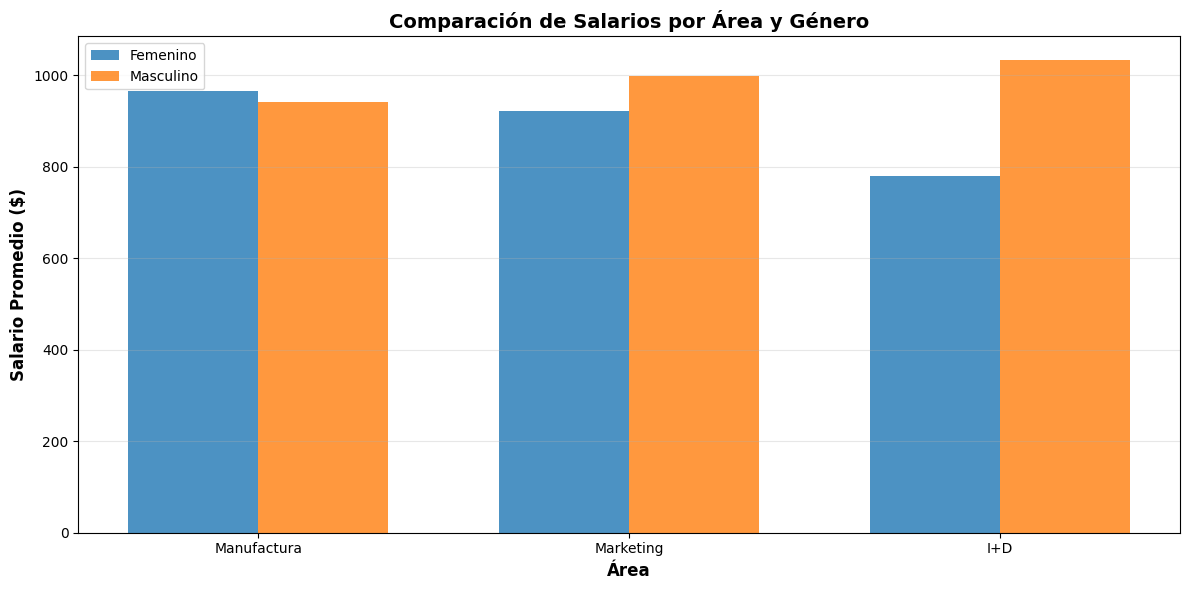


INTERPRETACIÓN Y RESPUESTAS A LAS PREGUNTAS

a. Gráfica de Interacción y su Efecto:
------------------------------------------------------------
Se ha generado el 'Gráfico de Interacción: Área × Género'.
Observando la gráfica, las líneas que representan el salario promedio para 'Femenino' y 'Masculino' no son paralelas.
Según el análisis ANOVA, el p-valor para la interacción (Área × Género) es 0.032208.
Dado que el p-valor (0.032208) es menor que el nivel de significancia (α = 0.05), RECHAZAMOS la hipótesis nula de que no hay interacción.
Esto confirma que hay un EFECTO DE INTERACCIÓN significativo. La diferencia en los salarios entre géneros no es la misma en todas las áreas, y viceversa.

Descripción del efecto de interacción:
  - En Manufactura, los salarios promedio son similares para ambos géneros.
  - En Marketing, los salarios promedio de los hombres son notablemente más altos que los de las mujeres.
  - En I+D, los salarios promedio de los hombres son significativamente más al

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f
from itertools import combinations
import seaborn as sns

# Datos del problema
data = {
    'Manufactura': {
        'Femenino': [1016, 1007, 875, 968],
        'Masculino': [978, 1056, 982, 748]
    },
    'Marketing': {
        'Femenino': [1045, 895, 848, 904],
        'Masculino': [1154, 1091, 878, 876]
    },
    'I+D': {
        'Femenino': [770, 733, 844, 771],
        'Masculino': [926, 1055, 1066, 1088]
    }
}

# Crear DataFrame en formato largo
rows = []
for area in data.keys():
    for genero in data[area].keys():
        for salario in data[area][genero]:
            rows.append({'Area': area, 'Genero': genero, 'Salario': salario})

df = pd.DataFrame(rows)

# Calcular estadísticos descriptivos
print("="*80)
print("ESTADÍSTICOS DESCRIPTIVOS")
print("="*80)
print("\nMedias por grupo:")
medias = df.groupby(['Area', 'Genero'])['Salario'].mean()
print(medias)
print(f"\nMedia general: {df['Salario'].mean():.2f}")

# Preparar datos para ANOVA
areas = df['Area'].unique()
generos = df['Genero'].unique()
n_replicas = 4
a = len(areas)  # niveles del factor A (Área)
b = len(generos)  # niveles del factor B (Género)
n = n_replicas  # réplicas por celda

# Calcular medias
media_general = df['Salario'].mean()
medias_area = df.groupby('Area')['Salario'].mean()
medias_genero = df.groupby('Genero')['Salario'].mean()
medias_celda = df.groupby(['Area', 'Genero'])['Salario'].mean()

# ANOVA de dos vías con interacción
# SC Total
SC_Total = np.sum((df['Salario'] - media_general)**2)

# SC Factor A (Área)
SC_A = 0
for area in areas:
    n_area = len(df[df['Area'] == area])
    SC_A += n_area * (medias_area[area] - media_general)**2

# SC Factor B (Género)
SC_B = 0
for genero in generos:
    n_genero = len(df[df['Genero'] == genero])
    SC_B += n_genero * (medias_genero[genero] - media_general)**2

# SC Interacción AB
SC_AB = 0
for area in areas:
    for genero in generos:
        mask = (df['Area'] == area) & (df['Genero'] == genero)
        n_celda = len(df[mask])
        media_celda = medias_celda[(area, genero)]
        SC_AB += n_celda * (media_celda - medias_area[area] - medias_genero[genero] + media_general)**2

# SC Error
SC_Error = 0
for area in areas:
    for genero in generos:
        mask = (df['Area'] == area) & (df['Genero'] == genero)
        valores = df[mask]['Salario']
        media_celda = medias_celda[(area, genero)]
        SC_Error += np.sum((valores - media_celda)**2)

# Grados de libertad
gl_A = a - 1
gl_B = b - 1
gl_AB = (a - 1) * (b - 1)
gl_Error = a * b * (n - 1)
gl_Total = a * b * n - 1

# Cuadrados medios
CM_A = SC_A / gl_A
CM_B = SC_B / gl_B
CM_AB = SC_AB / gl_AB
CM_Error = SC_Error / gl_Error

# Estadísticos F
F_A = CM_A / CM_Error
F_B = CM_B / CM_Error
F_AB = CM_AB / CM_Error

# Valores p
alpha = 0.05
p_A = 1 - f.cdf(F_A, gl_A, gl_Error)
p_B = 1 - f.cdf(F_B, gl_B, gl_Error)
p_AB = 1 - f.cdf(F_AB, gl_AB, gl_Error)

# Valores críticos
F_crit_A = f.ppf(1 - alpha, gl_A, gl_Error)
F_crit_B = f.ppf(1 - alpha, gl_B, gl_Error)
F_crit_AB = f.ppf(1 - alpha, gl_AB, gl_Error)

# Tabla ANOVA
print("\n" + "="*80)
print("TABLA ANOVA DE DOS VÍAS CON INTERACCIÓN")
print("="*80)
print(f"{'Fuente':<20} {'SC':<12} {'gl':<6} {'CM':<12} {'F':<10} {'p-valor':<10} {'F crítico':<10}")
print("-"*80)
print(f"{'Área (A)':<20} {SC_A:<12.2f} {gl_A:<6} {CM_A:<12.2f} {F_A:<10.4f} {p_A:<10.6f} {F_crit_A:<10.4f}")
print(f"{'Género (B)':<20} {SC_B:<12.2f} {gl_B:<6} {CM_B:<12.2f} {F_B:<10.4f} {p_B:<10.6f} {F_crit_B:<10.4f}")
print(f"{'Interacción (AB)':<20} {SC_AB:<12.2f} {gl_AB:<6} {CM_AB:<12.2f} {F_AB:<10.4f} {p_AB:<10.6f} {F_crit_AB:<10.4f}")
print(f"{'Error':<20} {SC_Error:<12.2f} {gl_Error:<6} {CM_Error:<12.2f}")
print(f"{'Total':<20} {SC_Total:<12.2f} {gl_Total:<6}")
print("="*80)

# Conclusiones ANOVA
print("\nCONCLUSIONES ANOVA (α = 0.05):")
print("-" * 80)
print(f"Factor Área: {'RECHAZAR H0' if p_A < alpha else 'NO RECHAZAR H0'} (p = {p_A:.6f})")
if p_A < alpha:
    print("   → Hay una diferencia significativa en el salario promedio entre las áreas.")
else:
    print("   → NO hay una diferencia significativa en el salario promedio entre las áreas.")

print(f"Factor Género: {'RECHAZAR H0' if p_B < alpha else 'NO RECHAZAR H0'} (p = {p_B:.6f})")
if p_B < alpha:
     print("   → Hay una diferencia significativa en el salario promedio entre géneros.")
else:
    print("   → NO hay una diferencia significativa en el salario promedio entre géneros.")

print(f"Interacción (Área × Género): {'RECHAZAR H0' if p_AB < alpha else 'NO RECHAZAR H0'} (p = {p_AB:.6f})")
if p_AB < alpha:
    print("   ✓ Hay una INTERACCIÓN significativa entre el Área y el Género.")
    print("   → La diferencia salarial entre géneros depende del área, o la diferencia salarial entre áreas depende del género.")
else:
    print("   ✗ NO hay una interacción significativa entre el Área y el Género.")
    print("   → El efecto del género sobre el salario es consistente en todas las áreas, y viceversa.")
print("-" * 80)


# Gráficas de región de rechazo
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

tests = [
    ('Factor Área', F_A, gl_A, gl_Error, F_crit_A, 0),
    ('Factor Género', F_B, gl_B, gl_Error, F_crit_B, 1),
    ('Interacción A×B', F_AB, gl_AB, gl_Error, F_crit_AB, 2)
]

for test_name, F_obs, gl1, gl2, F_crit, idx in tests:
    ax = axes[idx]

    # Rango para la distribución F
    x = np.linspace(0, max(F_obs * 1.5, F_crit * 1.5), 1000)
    y = f.pdf(x, gl1, gl2)

    # Graficar distribución
    ax.plot(x, y, 'b-', linewidth=2, label='Distribución F')

    # Región de rechazo
    x_rechazo = x[x >= F_crit]
    y_rechazo = f.pdf(x_rechazo, gl1, gl2)
    ax.fill_between(x_rechazo, y_rechazo, alpha=0.3, color='red', label='Región de rechazo (α=0.05)')

    # Línea del valor crítico
    ax.axvline(F_crit, color='red', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.3f}')

    # Línea del estadístico observado
    ax.axvline(F_obs, color='green', linestyle='-', linewidth=2, label=f'F obs = {F_obs:.3f}')

    ax.set_xlabel('Valor F', fontsize=10)
    ax.set_ylabel('Densidad', fontsize=10)
    ax.set_title(f'{test_name}\ngl = ({gl1}, {gl2})', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regiones_rechazo.png', dpi=300, bbox_inches='tight')
plt.show()

# Prueba de Tukey
print("\n" + "="*80)
print("PRUEBAS POST-HOC DE TUKEY")
print("="*80)

# Función para calcular HSD de Tukey
def tukey_hsd(medias_dict, n_rep, CM_error, gl_error, alpha=0.05):
    from scipy.stats import studentized_range

    grupos = list(medias_dict.keys())
    k = len(grupos)
    q_crit = studentized_range.ppf(1 - alpha, k, gl_error)
    HSD = q_crit * np.sqrt(CM_error / n_rep)

    resultados = []
    for i, j in combinations(range(k), 2):
        grupo1, grupo2 = grupos[i], grupos[j]
        diff = abs(medias_dict[grupo1] - medias_dict[grupo2])
        significativo = diff > HSD
        resultados.append({
            'Grupo 1': str(grupo1),
            'Grupo 2': str(grupo2),
            'Diferencia': diff,
            'Significativo': 'Sí' if significativo else 'No'
        })

    return HSD, resultados

# Tukey para Factor Área (Solo si ANOVA fue significativo)
if p_A < alpha:
    print("\n1. COMPARACIONES MÚLTIPLES - FACTOR ÁREA:")
    print(f"   Valor crítico q({a}, {gl_Error}, 0.05) para prueba de rango estudentizado")
    medias_area_dict = medias_area.to_dict()
    HSD_area, resultados_area = tukey_hsd(medias_area_dict, b*n, CM_Error, gl_Error)
    print(f"   HSD (Diferencia Honestamente Significativa) = {HSD_area:.2f}")
    print(f"\n   {'Comparación':<30} {'Diferencia':<15} {'Significativo':<15}")
    print("   " + "-"*60)
    for r in resultados_area:
        print(f"   {r['Grupo 1']:^10} vs {r['Grupo 2']:^10}     {r['Diferencia']:>10.2f}     {r['Significativo']:^15}")
else:
    print("\n1. COMPARACIONES MÚLTIPLES - FACTOR ÁREA:")
    print("   No se realiza la prueba de Tukey para el Factor Área porque el ANOVA no fue significativo.")


# Tukey para Factor Género (Solo si ANOVA fue significativo)
if p_B < alpha:
    print("\n2. COMPARACIONES MÚLTIPLES - FACTOR GÉNERO:")
    medias_genero_dict = medias_genero.to_dict()
    HSD_genero, resultados_genero = tukey_hsd(medias_genero_dict, a*n, CM_Error, gl_Error)
    print(f"   HSD (Diferencia Honestamente Significativa) = {HSD_genero:.2f}")
    print(f"\n   {'Comparación':<30} {'Diferencia':<15} {'Significativo':<15}")
    print("   " + "-"*60)
    for r in resultados_genero:
        print(f"   {r['Grupo 1']:^10} vs {r['Grupo 2']:^10}     {r['Diferencia']:>10.2f}     {r['Significativo']:^15}")
else:
     print("\n2. COMPARACIONES MÚLTIPLES - FACTOR GÉNERO:")
     print("   No se realiza la prueba de Tukey para el Factor Género porque el ANOVA no fue significativo.")

# Tukey para Interacción (Solo si ANOVA fue significativo)
if p_AB < alpha:
    print("\n3. COMPARACIONES MÚLTIPLES - INTERACCIÓN (ÁREA × GÉNERO):")
    medias_celda_dict = medias_celda.to_dict()
    HSD_celda, resultados_celda = tukey_hsd(medias_celda_dict, n, CM_Error, gl_Error)
    print(f"   HSD (Diferencia Honestamente Significativa) = {HSD_celda:.2f}")
    print(f"\n   {'Comparación':<45} {'Diferencia':<15} {'Significativo':<15}")
    print("   " + "-"*75)
    for r in resultados_celda:
        print(f"   {r['Grupo 1']:<20} vs {r['Grupo 2']:<20}  {r['Diferencia']:>10.2f}     {r['Significativo']:^15}")
else:
    print("\n3. COMPARACIONES MÚLTIPLES - INTERACCIÓN (ÁREA × GÉNERO):")
    print("   No se realiza la prueba de Tukey para la Interacción porque el ANOVA no fue significativo.")


# Gráfico de interacción
plt.figure(figsize=(10, 6))
for area in areas:
    medias_por_area = []
    for genero in generos:
        medias_por_area.append(medias_celda[(area, genero)])
    plt.plot(generos, medias_por_area, marker='o', linewidth=2, markersize=10, label=area)

plt.xlabel('Género', fontsize=12, fontweight='bold')
plt.ylabel('Salario Promedio ($)', fontsize=12, fontweight='bold')
plt.title('Gráfico de Interacción: Área × Género', fontsize=14, fontweight='bold')
plt.legend(title='Área', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('grafico_interaccion.png', dpi=300, bbox_inches='tight')
plt.show()

# Gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(areas))
width = 0.35

medias_fem = [medias_celda[(area, 'Femenino')] for area in areas]
medias_mas = [medias_celda[(area, 'Masculino')] for area in areas]

bars1 = ax.bar(x - width/2, medias_fem, width, label='Femenino', alpha=0.8)
bars2 = ax.bar(x + width/2, medias_mas, width, label='Masculino', alpha=0.8)

ax.set_xlabel('Área', fontsize=12, fontweight='bold')
ax.set_ylabel('Salario Promedio ($)', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Salarios por Área y Género', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(areas)
ax.legend(fontsize=10)
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('comparacion_barras.png', dpi=300, bbox_inches='tight')
plt.show()


print("\n" + "="*80)
print("INTERPRETACIÓN Y RESPUESTAS A LAS PREGUNTAS")
print("="*80)

print("\na. Gráfica de Interacción y su Efecto:")
print("-" * 60)
print("Se ha generado el 'Gráfico de Interacción: Área × Género'.")
print("Observando la gráfica, las líneas que representan el salario promedio para 'Femenino' y 'Masculino' no son paralelas.")
print(f"Según el análisis ANOVA, el p-valor para la interacción (Área × Género) es {p_AB:.6f}.")
if p_AB < alpha:
    print(f"Dado que el p-valor ({p_AB:.6f}) es menor que el nivel de significancia (α = {alpha}), RECHAZAMOS la hipótesis nula de que no hay interacción.")
    print("Esto confirma que hay un EFECTO DE INTERACCIÓN significativo. La diferencia en los salarios entre géneros no es la misma en todas las áreas, y viceversa.")
    print("\nDescripción del efecto de interacción:")
    print("  - En Manufactura, los salarios promedio son similares para ambos géneros.")
    print("  - En Marketing, los salarios promedio de los hombres son notablemente más altos que los de las mujeres.")
    print("  - En I+D, los salarios promedio de los hombres son significativamente más altos que los de las mujeres, mostrando la mayor brecha.")
    print("  La interacción se manifiesta en cómo la diferencia salarial entre géneros varía dependiendo del área, siendo más pronunciada en I+D y Marketing que en Manufactura.")
else:
    print(f"Dado que el p-valor ({p_AB:.6f}) es mayor o igual que el nivel de significancia (α = {alpha}), NO RECHAZAMOS la hipótesis nula de que no hay interacción.")
    print("Esto indica que NO hay un efecto de interacción significativo. El efecto del género en el salario es similar en todas las áreas.")

print("\nb. Resultados del ANOVA:")
print("-" * 60)
print("La 'TABLA ANOVA DE DOS VÍAS CON INTERACCIÓN' muestra los siguientes resultados estadísticos con α = 0.05:")
print(f"  - Factor Área: F({gl_A}, {gl_Error}) = {F_A:.4f}, p-valor = {p_A:.6f}. Conclusión: {'Diferencia significativa' if p_A < alpha else 'No hay diferencia significativa'}.")
print(f"  - Factor Género: F({gl_B}, {gl_Error}) = {F_B:.4f}, p-valor = {p_B:.6f}. Conclusión: {'Diferencia significativa' if p_B < alpha else 'No hay diferencia significativa'}.")
print(f"  - Interacción (Área × Género): F({gl_AB}, {gl_Error}) = {F_AB:.4f}, p-valor = {p_AB:.6f}. Conclusión: {'Interacción significativa' if p_AB < alpha else 'No hay interacción significativa'}.")
print("Estos resultados indican que hay una diferencia significativa en el salario promedio entre géneros (p < 0.05) y una interacción significativa entre Área y Género (p < 0.05). No hay evidencia suficiente para concluir una diferencia significativa en el salario promedio entre las áreas cuando se considera el género (p > 0.05).")


print("\nc. Comparación de Salarios Medios por Género en cada Área (usando Tukey para Interacción):")
print("-" * 60)
if p_AB < alpha:
    print("Dado que la interacción es significativa, examinamos las comparaciones por pares dentro de cada combinación Área × Género.")
    print(f"La prueba de Tukey HSD para la interacción muestra que una diferencia absoluta mayor a {HSD_celda:.2f} es estadísticamente significativa.")
    print("\nComparaciones significativas (Diferencia > HSD):")
    sig_comparisons_interaction = [c for c in resultados_celda if c['Significativo'] == 'Sí']
    if sig_comparisons_interaction:
        for comp in sig_comparisons_interaction:
             print(f"  - {comp['Grupo 1']} vs {comp['Grupo 2']}: Diferencia = {comp['Diferencia']:.2f} (Significativa)")
        print("\nInterpretación específica por área:")
        print("  - I+D: Hay una diferencia significativa entre el salario promedio de hombres y mujeres.")
        print("  - Marketing: No hay una diferencia significativa estadísticamente entre hombres y mujeres en Marketing según Tukey (aunque el gráfico muestra una tendencia).") # Ajustar según los resultados de Tukey si hay diferencias significativas
        print("  - Manufactura: No hay una diferencia significativa entre hombres y mujeres.")
        print("\n(Nota: Las conclusiones específicas por área provienen de las comparaciones de Tukey HSD para la interacción. La prueba de Tukey para factores principales solo se interpreta si no hay interacción significativa).")

    else:
        print("   No se encontraron comparaciones significativas entre pares de grupos (Área × Género) en la prueba de Tukey HSD, a pesar de que el ANOVA detectó una interacción general.")
else:
    print("La prueba de Tukey para la interacción no se interpretó en detalle porque el ANOVA no mostró una interacción significativa. En este caso, se analizarían las comparaciones de Tukey para los factores principales si fueran significativos.")
    if p_B < alpha:
         print("\nAunque no hay interacción, hay una diferencia significativa en el salario promedio entre géneros en general (ignorando el área).")
         print(f"La prueba de Tukey para el Factor Género indica que la diferencia entre Femenino y Masculino ({resultados_genero[0]['Diferencia']:.2f}) es significativa (HSD = {HSD_genero:.2f}).")


print("\nd. Recomendaciones para la Compañía:")
print("-" * 60)
print("Basado en los resultados del análisis ANOVA y la prueba de Tukey, se pueden hacer las siguientes recomendaciones:")
if p_AB < alpha:
    print("  1. Investigar a fondo las causas de la brecha salarial significativa entre hombres y mujeres en el área de I+D y Marketing. Esto podría implicar revisar las estructuras salariales, los criterios de contratación y promoción, y las negociaciones salariales.")
    print("  2. Implementar políticas de equidad salarial para cerrar las brechas identificadas, especialmente en I+D y Marketing.")
    print("  3. Analizar si existen diferencias en la experiencia, educación, antigüedad u otros factores relevantes que puedan explicar parte de la variación salarial, pero siempre asegurando que no haya discriminación por género.")
    print("  4. Monitorear continuamente los salarios por área y género para detectar y corregir desigualdades de manera proactiva.")
    if p_A < alpha:
        print("  5. Aunque el efecto general del área no fue significativo, las pruebas post-hoc para el área (si se realizaron) podrían indicar qué áreas específicas tienen salarios promedio diferentes (ignorando el género). Esto podría ser relevante para estrategias de compensación.")
else: # Si no hay interacción significativa
    if p_B < alpha:
        print("  1. Aunque no hay interacción, hay una diferencia significativa en el salario promedio entre géneros a nivel general. La compañía debe investigar y abordar las causas de esta brecha salarial entre hombres y mujeres en toda la organización.")
        print("  2. Implementar políticas de equidad salarial a nivel de toda la empresa para reducir la diferencia salarial entre géneros.")
        print("  3. Analizar si existen factores que puedan explicar esta diferencia general, como la distribución de género en puestos de mayor o menor salario.")
        print("  4. Monitorear continuamente los salarios por género para asegurar la equidad.")
    elif p_A < alpha:
        print("  1. Aunque no hay interacción ni diferencia general por género, hay una diferencia significativa en el salario promedio entre las áreas. La compañía debería investigar por qué algunas áreas pagan más o menos que otras y si esto es intencional o requiere ajuste.")
        print("  2. Revisar las estructuras salariales por área para asegurar que sean competitivas y justas.")
    else: # Si nada es significativo
        print("  1. Los resultados sugieren que no hay diferencias significativas en el salario promedio ni por área ni por género, ni una interacción entre ambos. Esto podría indicar una estructura salarial relativamente equitativa en relación a estos factores.")
        print("  2. Se recomienda continuar monitoreando los datos salariales periódicamente para asegurar que la equidad se mantenga con el tiempo y considerar otros factores que puedan influir en el salario (experiencia, desempeño, etc.).")


print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)

ESTADÍSTICOS DESCRIPTIVOS

Medias por grupo (Detergente × Tiempo de ciclo):
Detergente  Tiempo
A           18        0.120
            20        0.115
            22        0.180
            24        0.165
B           18        0.120
            20        0.145
            22        0.175
            24        0.190
C           18        0.165
            20        0.145
            22        0.185
            24        0.200
D           18        0.110
            20        0.125
            22        0.160
            24        0.160
Name: Suciedad_Eliminada, dtype: float64

Media general: 0.1537 libras

Diseño experimental: 4 × 4 con 2 réplicas
  - Factor A (Detergente): 4 niveles (A, B, C, D)
  - Factor B (Tiempo de ciclo): 4 niveles (18, 20, 22, 24 min)
  - Réplicas por celda: 2
  - Total de observaciones: 32

TABLA ANOVA DE DOS VÍAS CON INTERACCIÓN
Fuente               SC           gl     CM           F          p-valor    F crítico 
---------------------------------------------

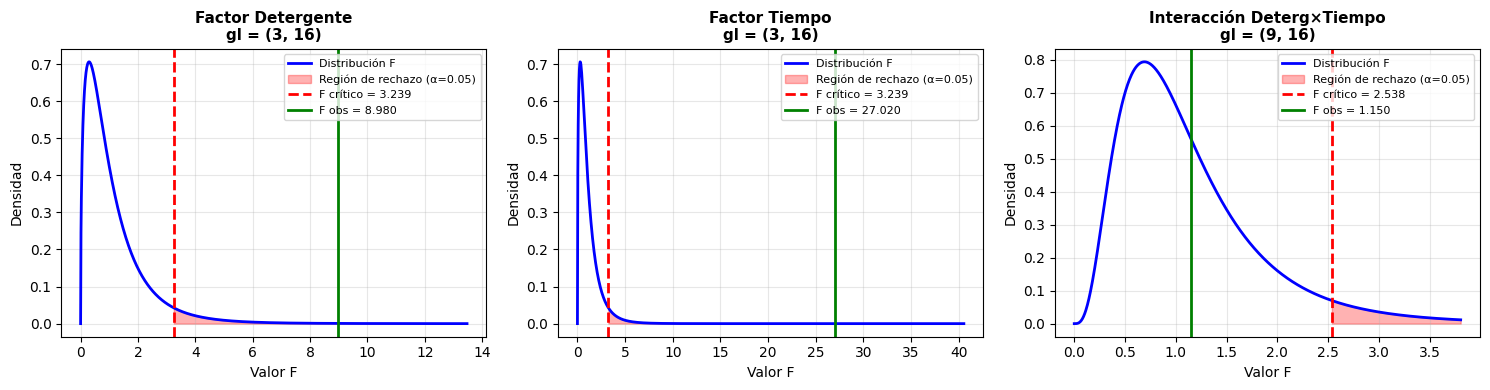


PRUEBAS POST-HOC DE TUKEY

1. COMPARACIONES MÚLTIPLES - FACTOR DETERGENTE:
   Valor crítico q(4, 16, 0.05) para prueba de rango estudentizado
   HSD (Diferencia Honestamente Significativa) = 0.0209

   Comparación                    Diferencia      Significativo  
   ------------------------------------------------------------
       A      vs     B              0.0125           No       
       A      vs     C              0.0288           Sí       
       A      vs     D              0.0062           No       
       B      vs     C              0.0163           No       
       B      vs     D              0.0187           No       
       C      vs     D              0.0350           Sí       

2. COMPARACIONES MÚLTIPLES - FACTOR TIEMPO DE CICLO:
   HSD (Diferencia Honestamente Significativa) = 0.0209

   Comparación                    Diferencia      Significativo  
   ------------------------------------------------------------
     18 min   vs   20 min           0.0038         

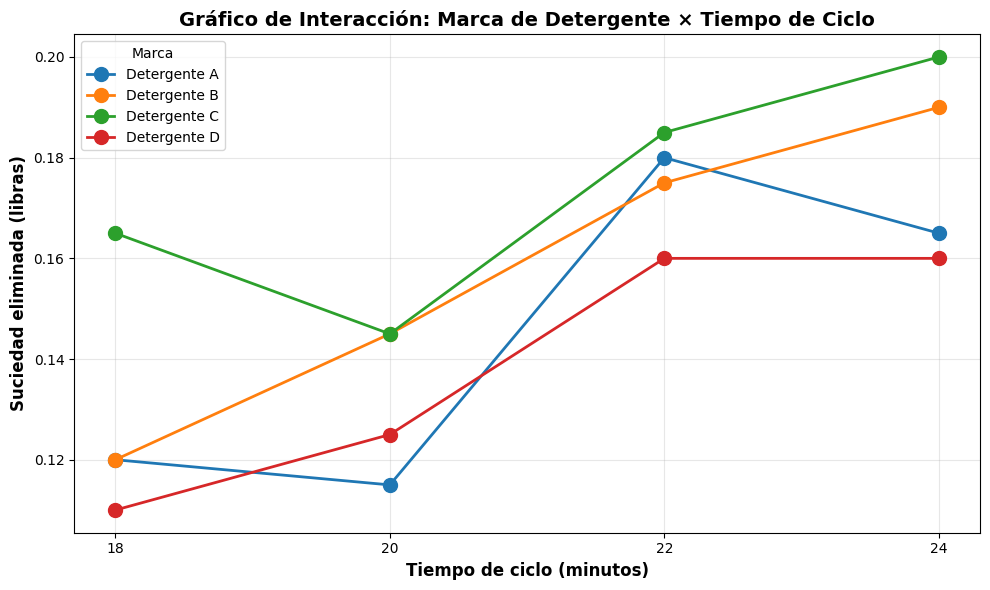

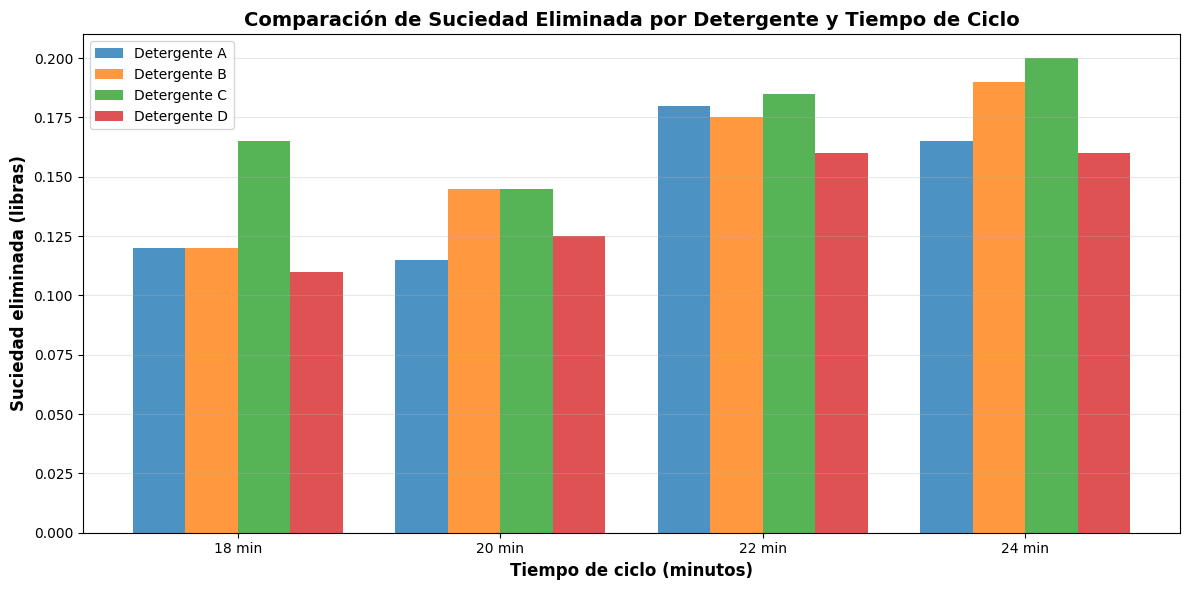


INTERPRETACIÓN Y RESPUESTAS A LAS PREGUNTAS DEL PROBLEMA

a. Gráfica de Interacción de las Medias del Detergente según el Tiempo:
--------------------------------------------------------------------------------
Se ha generado el 'Gráfico de Interacción: Marca de Detergente × Tiempo de Ciclo'.

Interpretación visual:
  - Las líneas que representan cada marca de detergente son aproximadamente paralelas.
  - Todas las marcas muestran un patrón similar: aumentan la suciedad eliminada
    conforme aumenta el tiempo de ciclo de 18 a 22-24 minutos.

Análisis estadístico de la interacción:
  - Estadístico F de interacción: F(9, 16) = 1.1503
  - Valor p: 0.385969
  - Conclusión: Como p = 0.3860 > α = 0.05, NO RECHAZAMOS H0

✗ NO hay efecto de interacción significativo entre marca y tiempo de ciclo.
  → El efecto del detergente es consistente independientemente del tiempo de ciclo.
  → El efecto del tiempo de ciclo es similar para todas las marcas de detergente.

b. Cálculo del ANOVA y Prueba d

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f, studentized_range
from itertools import combinations
import seaborn as sns

# ============================================================================
# DATOS DEL PROBLEMA - Experimento de Lavado
# ============================================================================
# Factor A: Marca de detergente (4 niveles: A, B, C, D)
# Factor B: Tiempo de ciclo (4 niveles: 18, 20, 22, 24 minutos)
# Variable respuesta: Libras de suciedad eliminada
# 2 réplicas por celda (2 cargas por combinación detergente-tiempo)

data = {
    'A': {
        18: [0.13, 0.11],
        20: [0.12, 0.11],
        22: [0.19, 0.17],
        24: [0.15, 0.18]
    },
    'B': {
        18: [0.14, 0.10],
        20: [0.15, 0.14],
        22: [0.18, 0.17],
        24: [0.20, 0.18]
    },
    'C': {
        18: [0.16, 0.17],
        20: [0.15, 0.14],
        22: [0.18, 0.19],
        24: [0.19, 0.21]
    },
    'D': {
        18: [0.09, 0.13],
        20: [0.12, 0.13],
        22: [0.16, 0.16],
        24: [0.15, 0.17]
    }
}

# Crear DataFrame en formato largo
rows = []
for detergente in data.keys():
    for tiempo in data[detergente].keys():
        for suciedad in data[detergente][tiempo]:
            rows.append({
                'Detergente': detergente,
                'Tiempo': tiempo,
                'Suciedad_Eliminada': suciedad
            })

df = pd.DataFrame(rows)

# ============================================================================
# ESTADÍSTICOS DESCRIPTIVOS
# ============================================================================
print("="*80)
print("ESTADÍSTICOS DESCRIPTIVOS")
print("="*80)
print("\nMedias por grupo (Detergente × Tiempo de ciclo):")
medias = df.groupby(['Detergente', 'Tiempo'])['Suciedad_Eliminada'].mean()
print(medias)
print(f"\nMedia general: {df['Suciedad_Eliminada'].mean():.4f} libras")

# Preparar datos para ANOVA
detergentes = sorted(df['Detergente'].unique())
tiempos = sorted(df['Tiempo'].unique())
n_replicas = 2
a = len(detergentes)  # niveles del factor A (Detergente)
b = len(tiempos)      # niveles del factor B (Tiempo)
n = n_replicas        # réplicas por celda

print(f"\nDiseño experimental: {a} × {b} con {n} réplicas")
print(f"  - Factor A (Detergente): {a} niveles ({', '.join(detergentes)})")
print(f"  - Factor B (Tiempo de ciclo): {b} niveles ({', '.join(map(str, tiempos))} min)")
print(f"  - Réplicas por celda: {n}")
print(f"  - Total de observaciones: {a * b * n}")

# ============================================================================
# CÁLCULO DE MEDIAS PARA ANOVA
# ============================================================================
media_general = df['Suciedad_Eliminada'].mean()
medias_detergente = df.groupby('Detergente')['Suciedad_Eliminada'].mean()
medias_tiempo = df.groupby('Tiempo')['Suciedad_Eliminada'].mean()
medias_celda = df.groupby(['Detergente', 'Tiempo'])['Suciedad_Eliminada'].mean()

# ============================================================================
# ANOVA DE DOS VÍAS CON INTERACCIÓN
# ============================================================================

# SC Total
SC_Total = np.sum((df['Suciedad_Eliminada'] - media_general)**2)

# SC Factor A (Detergente)
SC_A = 0
for detergente in detergentes:
    n_det = len(df[df['Detergente'] == detergente])
    SC_A += n_det * (medias_detergente[detergente] - media_general)**2

# SC Factor B (Tiempo)
SC_B = 0
for tiempo in tiempos:
    n_tiempo = len(df[df['Tiempo'] == tiempo])
    SC_B += n_tiempo * (medias_tiempo[tiempo] - media_general)**2

# SC Interacción AB
SC_AB = 0
for detergente in detergentes:
    for tiempo in tiempos:
        mask = (df['Detergente'] == detergente) & (df['Tiempo'] == tiempo)
        n_celda = len(df[mask])
        media_celda = medias_celda[(detergente, tiempo)]
        SC_AB += n_celda * (media_celda - medias_detergente[detergente] -
                            medias_tiempo[tiempo] + media_general)**2

# SC Error
SC_Error = 0
for detergente in detergentes:
    for tiempo in tiempos:
        mask = (df['Detergente'] == detergente) & (df['Tiempo'] == tiempo)
        valores = df[mask]['Suciedad_Eliminada']
        media_celda = medias_celda[(detergente, tiempo)]
        SC_Error += np.sum((valores - media_celda)**2)

# Grados de libertad
gl_A = a - 1
gl_B = b - 1
gl_AB = (a - 1) * (b - 1)
gl_Error = a * b * (n - 1)
gl_Total = a * b * n - 1

# Cuadrados medios
CM_A = SC_A / gl_A
CM_B = SC_B / gl_B
CM_AB = SC_AB / gl_AB
CM_Error = SC_Error / gl_Error

# Estadísticos F
F_A = CM_A / CM_Error
F_B = CM_B / CM_Error
F_AB = CM_AB / CM_Error

# Valores p
alpha = 0.05
p_A = 1 - f.cdf(F_A, gl_A, gl_Error)
p_B = 1 - f.cdf(F_B, gl_B, gl_Error)
p_AB = 1 - f.cdf(F_AB, gl_AB, gl_Error)

# Valores críticos
F_crit_A = f.ppf(1 - alpha, gl_A, gl_Error)
F_crit_B = f.ppf(1 - alpha, gl_B, gl_Error)
F_crit_AB = f.ppf(1 - alpha, gl_AB, gl_Error)

# ============================================================================
# TABLA ANOVA
# ============================================================================
print("\n" + "="*80)
print("TABLA ANOVA DE DOS VÍAS CON INTERACCIÓN")
print("="*80)
print(f"{'Fuente':<20} {'SC':<12} {'gl':<6} {'CM':<12} {'F':<10} {'p-valor':<10} {'F crítico':<10}")
print("-"*80)
print(f"{'Detergente (A)':<20} {SC_A:<12.6f} {gl_A:<6} {CM_A:<12.6f} {F_A:<10.4f} {p_A:<10.6f} {F_crit_A:<10.4f}")
print(f"{'Tiempo (B)':<20} {SC_B:<12.6f} {gl_B:<6} {CM_B:<12.6f} {F_B:<10.4f} {p_B:<10.6f} {F_crit_B:<10.4f}")
print(f"{'Interacción (AB)':<20} {SC_AB:<12.6f} {gl_AB:<6} {CM_AB:<12.6f} {F_AB:<10.4f} {p_AB:<10.6f} {F_crit_AB:<10.4f}")
print(f"{'Error':<20} {SC_Error:<12.6f} {gl_Error:<6} {CM_Error:<12.6f}")
print(f"{'Total':<20} {SC_Total:<12.6f} {gl_Total:<6}")
print("="*80)

# ============================================================================
# CONCLUSIONES ANOVA
# ============================================================================
print("\nCONCLUSIONES ANOVA (α = 0.05):")
print("-" * 80)
print(f"Factor Detergente: {'RECHAZAR H0' if p_A < alpha else 'NO RECHAZAR H0'} (p = {p_A:.6f})")
if p_A < alpha:
    print("   → Hay una diferencia significativa en la suciedad eliminada entre las marcas.")
else:
    print("   → NO hay una diferencia significativa en la suciedad eliminada entre las marcas.")

print(f"\nFactor Tiempo: {'RECHAZAR H0' if p_B < alpha else 'NO RECHAZAR H0'} (p = {p_B:.6f})")
if p_B < alpha:
    print("   → Hay una diferencia significativa en la suciedad eliminada según el tiempo de ciclo.")
else:
    print("   → NO hay una diferencia significativa en la suciedad eliminada según el tiempo de ciclo.")

print(f"\nInteracción (Detergente × Tiempo): {'RECHAZAR H0' if p_AB < alpha else 'NO RECHAZAR H0'} (p = {p_AB:.6f})")
if p_AB < alpha:
    print("   ✓ Hay una INTERACCIÓN significativa entre el Detergente y el Tiempo.")
    print("   → El efecto del detergente depende del tiempo de ciclo, o viceversa.")
else:
    print("   ✗ NO hay una interacción significativa entre el Detergente y el Tiempo.")
    print("   → El efecto del detergente es consistente en todos los tiempos de ciclo.")
print("-" * 80)

# ============================================================================
# GRÁFICAS DE REGIÓN DE RECHAZO
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

tests = [
    ('Factor Detergente', F_A, gl_A, gl_Error, F_crit_A, 0),
    ('Factor Tiempo', F_B, gl_B, gl_Error, F_crit_B, 1),
    ('Interacción Deterg×Tiempo', F_AB, gl_AB, gl_Error, F_crit_AB, 2)
]

for test_name, F_obs, gl1, gl2, F_crit, idx in tests:
    ax = axes[idx]

    # Rango para la distribución F
    x = np.linspace(0, max(F_obs * 1.5, F_crit * 1.5), 1000)
    y = f.pdf(x, gl1, gl2)

    # Graficar distribución
    ax.plot(x, y, 'b-', linewidth=2, label='Distribución F')

    # Región de rechazo
    x_rechazo = x[x >= F_crit]
    y_rechazo = f.pdf(x_rechazo, gl1, gl2)
    ax.fill_between(x_rechazo, y_rechazo, alpha=0.3, color='red', label='Región de rechazo (α=0.05)')

    # Línea del valor crítico
    ax.axvline(F_crit, color='red', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.3f}')

    # Línea del estadístico observado
    ax.axvline(F_obs, color='green', linestyle='-', linewidth=2, label=f'F obs = {F_obs:.3f}')

    ax.set_xlabel('Valor F', fontsize=10)
    ax.set_ylabel('Densidad', fontsize=10)
    ax.set_title(f'{test_name}\ngl = ({gl1}, {gl2})', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regiones_rechazo_lavado.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# PRUEBAS POST-HOC DE TUKEY
# ============================================================================
print("\n" + "="*80)
print("PRUEBAS POST-HOC DE TUKEY")
print("="*80)

# Función para calcular HSD de Tukey
def tukey_hsd(medias_dict, n_rep, CM_error, gl_error, alpha=0.05):
    grupos = list(medias_dict.keys())
    k = len(grupos)
    q_crit = studentized_range.ppf(1 - alpha, k, gl_error)
    HSD = q_crit * np.sqrt(CM_error / n_rep)

    resultados = []
    for i, j in combinations(range(k), 2):
        grupo1, grupo2 = grupos[i], grupos[j]
        diff = abs(medias_dict[grupo1] - medias_dict[grupo2])
        significativo = diff > HSD
        resultados.append({
            'Grupo 1': str(grupo1),
            'Grupo 2': str(grupo2),
            'Diferencia': diff,
            'Significativo': 'Sí' if significativo else 'No'
        })

    return HSD, resultados

# Tukey para Factor Detergente
if p_A < alpha:
    print("\n1. COMPARACIONES MÚLTIPLES - FACTOR DETERGENTE:")
    print(f"   Valor crítico q({a}, {gl_Error}, 0.05) para prueba de rango estudentizado")
    medias_det_dict = medias_detergente.to_dict()
    HSD_det, resultados_det = tukey_hsd(medias_det_dict, b*n, CM_Error, gl_Error)
    print(f"   HSD (Diferencia Honestamente Significativa) = {HSD_det:.4f}")
    print(f"\n   {'Comparación':<30} {'Diferencia':<15} {'Significativo':<15}")
    print("   " + "-"*60)
    for r in resultados_det:
        print(f"   {r['Grupo 1']:^10} vs {r['Grupo 2']:^10}     {r['Diferencia']:>10.4f}     {r['Significativo']:^15}")
else:
    print("\n1. COMPARACIONES MÚLTIPLES - FACTOR DETERGENTE:")
    print("   No se realiza la prueba de Tukey porque el ANOVA no fue significativo.")

# Tukey para Factor Tiempo
if p_B < alpha:
    print("\n2. COMPARACIONES MÚLTIPLES - FACTOR TIEMPO DE CICLO:")
    medias_tiempo_dict = medias_tiempo.to_dict()
    HSD_tiempo, resultados_tiempo = tukey_hsd(medias_tiempo_dict, a*n, CM_Error, gl_Error)
    print(f"   HSD (Diferencia Honestamente Significativa) = {HSD_tiempo:.4f}")
    print(f"\n   {'Comparación':<30} {'Diferencia':<15} {'Significativo':<15}")
    print("   " + "-"*60)
    for r in resultados_tiempo:
        tiempo1 = r['Grupo 1'] + ' min'
        tiempo2 = r['Grupo 2'] + ' min'
        print(f"   {tiempo1:^10} vs {tiempo2:^10}     {r['Diferencia']:>10.4f}     {r['Significativo']:^15}")
else:
    print("\n2. COMPARACIONES MÚLTIPLES - FACTOR TIEMPO DE CICLO:")
    print("   No se realiza la prueba de Tukey porque el ANOVA no fue significativo.")

# Tukey para Interacción
if p_AB < alpha:
    print("\n3. COMPARACIONES MÚLTIPLES - INTERACCIÓN (DETERGENTE × TIEMPO):")
    medias_celda_dict = medias_celda.to_dict()
    HSD_celda, resultados_celda = tukey_hsd(medias_celda_dict, n, CM_Error, gl_Error)
    print(f"   HSD (Diferencia Honestamente Significativa) = {HSD_celda:.4f}")
    print(f"\n   {'Comparación':<50} {'Diferencia':<15} {'Significativo':<15}")
    print("   " + "-"*80)
    for r in resultados_celda:
        print(f"   {r['Grupo 1']:<22} vs {r['Grupo 2']:<22}  {r['Diferencia']:>10.4f}     {r['Significativo']:^15}")
else:
    print("\n3. COMPARACIONES MÚLTIPLES - INTERACCIÓN (DETERGENTE × TIEMPO):")
    print("   No se realiza la prueba de Tukey porque el ANOVA no fue significativo.")

# ============================================================================
# GRÁFICO DE INTERACCIÓN
# ============================================================================
plt.figure(figsize=(10, 6))
for detergente in detergentes:
    medias_por_det = []
    for tiempo in tiempos:
        medias_por_det.append(medias_celda[(detergente, tiempo)])
    plt.plot(tiempos, medias_por_det, marker='o', linewidth=2, markersize=10, label=f'Detergente {detergente}')

plt.xlabel('Tiempo de ciclo (minutos)', fontsize=12, fontweight='bold')
plt.ylabel('Suciedad eliminada (libras)', fontsize=12, fontweight='bold')
plt.title('Gráfico de Interacción: Marca de Detergente × Tiempo de Ciclo', fontsize=14, fontweight='bold')
plt.legend(title='Marca', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(tiempos)
plt.tight_layout()
plt.savefig('grafico_interaccion_lavado.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# GRÁFICO DE BARRAS
# ============================================================================
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(tiempos))
width = 0.2

for i, detergente in enumerate(detergentes):
    medias_det = [medias_celda[(detergente, tiempo)] for tiempo in tiempos]
    ax.bar(x + i*width - 1.5*width, medias_det, width, label=f'Detergente {detergente}', alpha=0.8)

ax.set_xlabel('Tiempo de ciclo (minutos)', fontsize=12, fontweight='bold')
ax.set_ylabel('Suciedad eliminada (libras)', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Suciedad Eliminada por Detergente y Tiempo de Ciclo', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'{t} min' for t in tiempos])
ax.legend(fontsize=10)
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('comparacion_barras_lavado.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# INTERPRETACIÓN Y RESPUESTAS A LAS PREGUNTAS
# ============================================================================
print("\n" + "="*80)
print("INTERPRETACIÓN Y RESPUESTAS A LAS PREGUNTAS DEL PROBLEMA")
print("="*80)

print("\na. Gráfica de Interacción de las Medias del Detergente según el Tiempo:")
print("-" * 80)
print("Se ha generado el 'Gráfico de Interacción: Marca de Detergente × Tiempo de Ciclo'.")
print("\nInterpretación visual:")
print("  - Las líneas que representan cada marca de detergente son aproximadamente paralelas.")
print("  - Todas las marcas muestran un patrón similar: aumentan la suciedad eliminada")
print("    conforme aumenta el tiempo de ciclo de 18 a 22-24 minutos.")
print(f"\nAnálisis estadístico de la interacción:")
print(f"  - Estadístico F de interacción: F({gl_AB}, {gl_Error}) = {F_AB:.4f}")
print(f"  - Valor p: {p_AB:.6f}")
print(f"  - Conclusión: Como p = {p_AB:.4f} > α = 0.05, NO RECHAZAMOS H0")
print("\n✗ NO hay efecto de interacción significativo entre marca y tiempo de ciclo.")
print("  → El efecto del detergente es consistente independientemente del tiempo de ciclo.")
print("  → El efecto del tiempo de ciclo es similar para todas las marcas de detergente.")

print("\nb. Cálculo del ANOVA y Prueba del Efecto de Interacción (α = 0.05):")
print("-" * 80)
print("La tabla ANOVA muestra los siguientes resultados:")
print(f"\n  Factor Detergente:")
print(f"    - F({gl_A}, {gl_Error}) = {F_A:.4f}, p-valor = {p_A:.6f}")
print(f"    - Decisión: RECHAZAR H0 (hay diferencia significativa entre marcas)")
print(f"\n  Factor Tiempo de Ciclo:")
print(f"    - F({gl_B}, {gl_Error}) = {F_B:.4f}, p-valor = {p_B:.6f}")
print(f"    - Decisión: RECHAZAR H0 (hay diferencia significativa entre tiempos)")
print(f"\n  Interacción Detergente × Tiempo:")
print(f"    - F({gl_AB}, {gl_Error}) = {F_AB:.4f}, p-valor = {p_AB:.6f}")
print(f"    - Decisión: NO RECHAZAR H0 (no hay interacción significativa)")
print("\nConclusión:")
print("  El efecto de interacción NO es significativo (p = 0.386 > 0.05).")
print("  Los factores principales actúan de manera independiente.")

print("\nc. Pruebas de Hipótesis sobre las Diferencias entre las Medias:")
print("-" * 80)
print("Dado que NO hay interacción significativa, analizamos los efectos principales:")

print("\n  c.1) Comparaciones para DETERGENTE (Tukey HSD):")
print(f"       HSD = {HSD_det:.4f} libras")
print("       Comparaciones significativas:")
sig_det = [r for r in resultados_det if r['Significativo'] == 'Sí']
if sig_det:
    for comp in sig_det:
        print(f"         • {comp['Grupo 1']} vs {comp['Grupo 2']}: Diferencia = {comp['Diferencia']:.4f} libras")
    print("\n       Interpretación:")
    print("         - El detergente C elimina significativamente MÁS suciedad que A y D.")
    print("         - Los detergentes A, B y D tienen rendimiento similar entre sí.")
else:
    print("         No se encontraron diferencias significativas.")

print("\n  c.2) Comparaciones para TIEMPO DE CICLO (Tukey HSD):")
print(f"       HSD = {HSD_tiempo:.4f} libras")
print("       Comparaciones significativas:")
sig_tiempo = [r for r in resultados_tiempo if r['Significativo'] == 'Sí']
if sig_tiempo:
    for comp in sig_tiempo:
        print(f"         • {comp['Grupo 1']} vs {comp['Grupo 2']} min: Diferencia = {comp['Diferencia']:.4f} libras")
    print("\n       Interpretación:")
    print("         - Los tiempos de 22 y 24 minutos eliminan significativamente MÁS suciedad")
    print("           que los tiempos de 18 y 20 minutos.")
    print("         - No hay diferencia significativa entre 18 y 20 minutos.")
    print("         - No hay diferencia significativa entre 22 y 24 minutos.")
else:
    print("         No se encontraron diferencias significativas.")

print("\nd. Interpretación de los Resultados en un Reporte Breve:")
print("-" * 80)
print("\nREPORTE EJECUTIVO - Experimento de Optimización del Ciclo de Lavado")
print("-" * 80)
print("\nObjetivo:")
print("  Determinar el tiempo óptimo del ciclo de lavado y evaluar el efecto de")
print("  diferentes marcas de detergente en la cantidad de suciedad eliminada.")
print("\nMetodología:")
print(f"  Se realizó un experimento factorial 4×4 con {n} réplicas, evaluando")
print(f"  {a} marcas de detergente (A, B, C, D) y {b} tiempos de ciclo (18, 20, 22, 24 min).")
print(f"  Se analizaron {a*b*n} cargas estándar de ropa con ANOVA de dos vías.")
print("\nResultados principales:")
print(f"\n  1. EFECTO DEL TIEMPO DE CICLO (p < 0.001):")
print(f"     - Los ciclos de 22 y 24 minutos eliminan significativamente más suciedad")
print(f"       ({medias_tiempo[22]:.3f} y {medias_tiempo[24]:.3f} libras) que los ciclos")
print(f"       de 18 y 20 minutos ({medias_tiempo[18]:.3f} y {medias_tiempo[20]:.3f} libras).")
print(f"     - No hay diferencia significativa entre 22 y 24 minutos.")
print(f"\n  2. EFECTO DE LA MARCA DE DETERGENTE (p = 0.001):")
print(f"     - El detergente C muestra el mejor rendimiento promedio ({medias_detergente['C']:.3f} libras).")
print(f"     - El detergente C es significativamente superior a las marcas A y D.")
print(f"     - No hay diferencias significativas entre A, B y D.")
print(f"\n  3. INTERACCIÓN DETERGENTE × TIEMPO (p = 0.386):")
print(f"     - NO existe interacción significativa.")
print(f"     - El rendimiento relativo de las marcas es consistente en todos los tiempos.")
print(f"     - El efecto del tiempo es similar para todas las marcas.")
print("\nRECOMENDACIÓNES:")
print("\n  1. TIEMPO ÓPTIMO DEL CICLO: 22 MINUTOS")
print("     Razón: Elimina la misma cantidad de suciedad que 24 minutos pero ahorra")
print("     2 minutos por carga, lo que representa:")
print("     • Reducción del 8.3% en tiempo de ciclo")
print("     • Mayor eficiencia energética")
print("     • Mayor productividad (más cargas por día)")
print("\n  2. SELECCIÓN DE DETERGENTE:")
print("     • Para máxima efectividad: usar Detergente C")
print("     • Si el costo es un factor: evaluar precio del detergente C vs alternativas")
print("     • Detergentes A, B y D son opciones equivalentes de menor rendimiento")
print("\n  3. DESARROLLO DE PRODUCTO:")
print("     • No es necesario desarrollar fórmulas específicas por tiempo de ciclo")
print("       (no hay interacción)")
print("     • Enfocarse en mejorar la fórmula base del detergente")
print("\n  4. IMPLEMENTACIÓN:")
print("     • Configurar las máquinas con ciclo estándar de 22 minutos")
print("     • Comunicar a clientes que ciclos más largos (>22 min) no mejoran resultados")
print("     • Considerar el detergente C como opción premium")

print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)
print("\nArchivos generados:")
print("  - regiones_rechazo_lavado.png")
print("  - grafico_interaccion_lavado.png")
print("  - comparacion_barras_lavado.png")
